# Import Statements

In [64]:
# Importing necessary libraries
import os   # For file and directory operations
import re   # For regular expression operations
import string   # For string manipulation
import numpy as np   # For numerical computations
import pandas as pd   # For handling data in DataFrame format
import matplotlib.pyplot as plt   # For data visualization
import pickle   # For saving and loading serialized objects
import tensorflow as tf   # For building deep learning models

# Text preprocessing and natural language processing libraries
from bs4 import BeautifulSoup   # For HTML parsing
from collections import Counter   # For counting hashable objects
from num2words import num2words   # For converting numbers to words
from nltk.corpus import stopwords   # For removing common words that add little meaning
from nltk.stem import PorterStemmer, WordNetLemmatizer   # For stemming and lemmatizing words
from nltk.tokenize import word_tokenize, TreebankWordTokenizer   # For tokenizing text
import contractions   # For expanding contractions in text

# Download necessary NLTK resources
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

# Machine Learning and Deep Learning libraries
from sklearn.model_selection import train_test_split   # For splitting data into train and test sets
from sklearn.utils import shuffle   # For shuffling data
from contractions import contractions_dict   # For expanding contractions in text.
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint   # For managing training callbacks
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GRU   # Neural network layers
from tensorflow.keras.metrics import SparseTopKCategoricalAccuracy   # Accuracy metric for classification
from tensorflow.keras.models import Sequential   # For building a sequential neural network model
from tensorflow.keras.optimizers import Adam   # Optimizer for training
from tensorflow.keras.preprocessing.sequence import pad_sequences   # For padding sequences
from tensorflow.keras.preprocessing.text import Tokenizer   # For text tokenization

# Additional imports for visualization and NLP
from wordcloud import WordCloud   # For generating word clouds
import spacy   # For advanced NLP tasks (e.g., named entity recognition)

# Lemmatizer and Stopwords.
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Harry\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Harry\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Dataset Statistics

Sample Text:
 ﻿The Project Gutenberg eBook of David Copperfield
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.

Title: David Copperfield

Author: Charles Dickens

Release date: December 1, 1996 [eBook #766]
                Most recently updated: July 11, 2024

Language: English

Original publication: , 1869

Credits: Credits: Jo Churcher and David Widger


*** START OF THE PROJECT GUTENBERG EBOOK DAVID COPPERFIELD ***




DAVID COPPERFIELD


By Charles Dickens




               AFFECTIONATELY INSCRIBED
                             TO
               THE HON. Mr. AND Mrs. RICHARD WATSON,
     

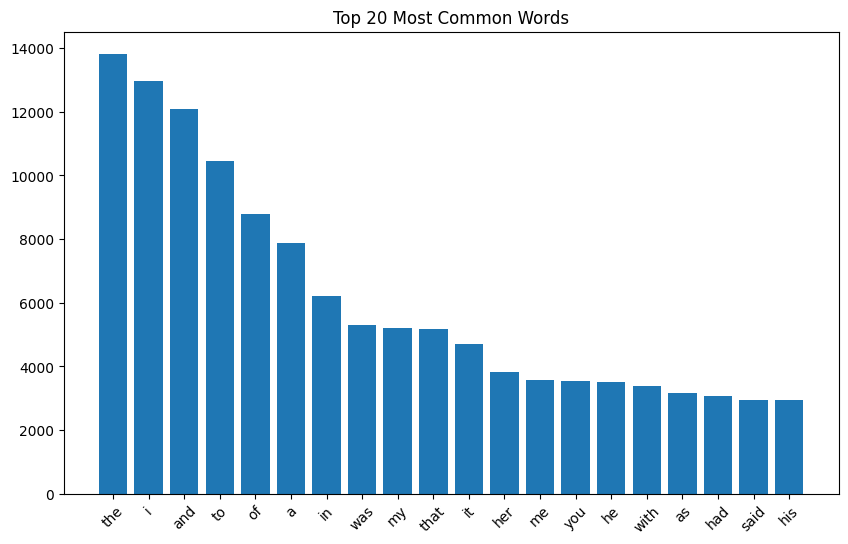

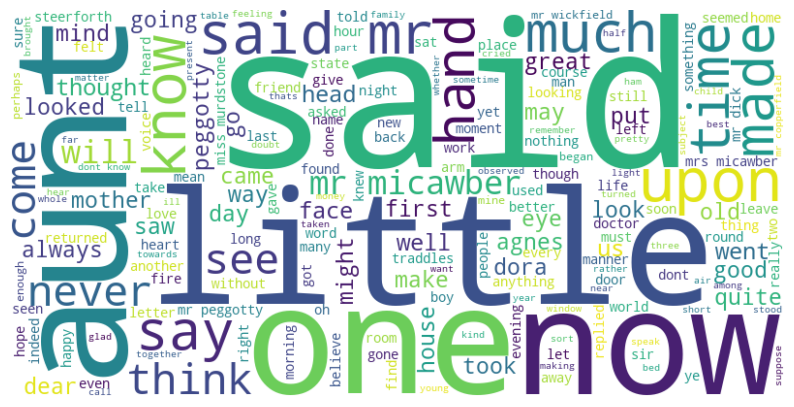

Dataset length: 1954026 characters
Total Words: 357844
Average Word Length: 4.18 characters
Total Sentences: 23144
Average Sentence Length: 15.86 words
Sentence Length Range: 1 to 233 words
Top 10 Most Common Words:
the: 13829
and: 12083
to: 10465
a: 7865
of: 8772
was: 5284
he: 3512
in: 6220
that: 5172
it: 4695
Vocabulary Size: 14223
Embedding Dimension: 100
Sequence Length: 12


In [ ]:
# Load and read text file
file_path = 'pg766.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    data = file.read()

# Preview the first 1000 characters of the dataset
print("Sample Text:\n", data[:1000])

# Clean and tokenize the text using TreebankWordTokenizer
def clean_and_tokenize(text):
    text = text.lower()  # Lowercase the text
    text = re.sub(r'[^a-z\s]', '', text)  # Remove non-alphabetic characters
    tok = TreebankWordTokenizer()  # Alternative tok
    tokens = tok.tokenize(text)
    return tokens

# Tokenize the data
tokens = clean_and_tokenize(data)

# Count word frequencies and get the 20 most common words
word_freq = Counter(tokens)
most_common_words = word_freq.most_common(20)

# Plotting the word frequency distribution
words, counts = zip(*most_common_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.title('Top 20 Most Common Words')
plt.xticks(rotation=45)
plt.show()

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokens))

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Dataset length in characters
print(f"Dataset length: {len(data)} characters")

# Tokenize the text to extract words and calculate total number of words
total_words = len(tokens)
print(f"Total Words: {total_words}")

# Calculate the length of each word and compute the average word length
word_lengths = [len(word) for word in tokens]
average_word_length = sum(word_lengths) / len(word_lengths)
print(f"Average Word Length: {average_word_length:.2f} characters")

# Split the text into sentences and calculate sentence lengths
sentences = re.split(r'[.!?]+', data)
sentences = [sentence.strip() for sentence in sentences if sentence.strip()]  # Remove empty strings
sentence_lengths = [len(re.findall(r'\b\w+\b', sentence)) for sentence in sentences]

# Calculate sentence statistics
total_sentences = len(sentence_lengths)
average_sentence_length = sum(sentence_lengths) / total_sentences
min_sentence_length = min(sentence_lengths)
max_sentence_length = max(sentence_lengths)

print(f"Total Sentences: {total_sentences}")
print(f"Average Sentence Length: {average_sentence_length:.2f} words")
print(f"Sentence Length Range: {min_sentence_length} to {max_sentence_length} words")

# Specific word counts for commonly used words
words_to_count = ['the', 'and', 'to', 'a', 'of', 'was', 'he', 'in', 'that', 'it']
print("Top 10 Most Common Words:")
for word in words_to_count:
    count = word_freq.get(word, 0)
    print(f"{word}: {count}")

# Define a simple tok using regular expressions and calculate vocabulary size
def simple_tok(text):
    tokens = re.findall(r'\b\w+\b', text)
    return tokens

# Calculate vocabulary size and embedding dimension
tokens = simple_tok(data.lower())
VocabularySize = len(set(tokens))
embeddingDimension = min(300, int(VocabularySize ** 0.25) * 10)  # Heuristic for embedding dimension

print(f"Vocabulary Size: {VocabularySize}")
print(f"Embedding Dimension: {embeddingDimension}")

# Calculate sentence lengths to determine an optimal sequence length
sentence_lengths = [len(simple_tok(sentence)) for sentence in data.splitlines()]
avg_length = int(sum(sentence_lengths) / len(sentence_lengths))
median_length = int(sorted(sentence_lengths)[len(sentence_lengths) // 2])

# Set sequence length based on median sentence length
sequenceLength = min(15, max(5, median_length))
print(f"Sequence Length: {sequenceLength}")

# Model 1
This model has no data pre-processing, no modification of unique words, and uses 10d.

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4246 - loss: 5.1556 - sparse_top_k_categorical_accuracy: 0.4692 - val_accuracy: 0.4768 - val_loss: 3.7431 - val_sparse_top_k_categorical_accuracy: 0.5252
Epoch 2/10
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.4249 - loss: 3.7499 - sparse_top_k_categorical_accuracy: 0.4739 - val_accuracy: 0.4768 - val_loss: 3.8404 - val_sparse_top_k_categorical_accuracy: 0.5252
Epoch 3/10
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.4264 - loss: 3.6765 - sparse_top_k_categorical_accuracy: 0.4748 - val_accuracy: 0.4768 - val_loss: 3.8198 - val_sparse_top_k_categorical_accuracy: 0.5219
Epoch 4/10
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.4257 - loss: 3.5657 - sparse_top_k_categorical_accuracy: 0.4836 - val_accuracy: 0.4753 - val_loss: 3.8461 - val_sparse_top_k_categorical_accuracy: 0.5335
Epoch 5/10
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.4297 - loss: 3.4652 - sparse_top_k_ca

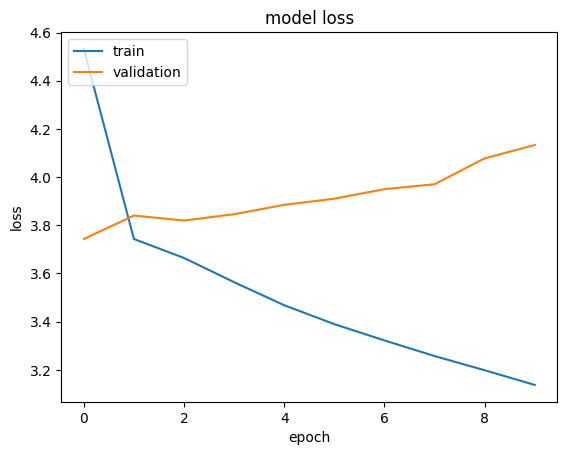

In [52]:
embeddingDimension = 10  
sequenceLength = 12
batch_size = 32

# Create the tokenizer and build vocabulary from the dataset.
tok = Tokenizer()
tok.fit_on_texts(data.splitlines())
VocabularySize = len(tok.word_index) + 1 

# Convert texts to sequences and pads them to a consistent length.
sequences = tok.texts_to_sequences(data.splitlines())
paddedSequences = pad_sequences(sequences, maxlen=sequenceLength, padding='post')
X = paddedSequences[:, :-1]  
y = paddedSequences[:, -1] 

# Building the model.
model = tf.keras.Sequential([
    Embedding(input_dim=VocabularySize, output_dim=embeddingDimension, input_length=sequenceLength-1),
    # First LSTM layer, returns sequences for stacking.
    LSTM(128, return_sequences=True), 
    LSTM(64),
    Dense(64, activation='relu'),
    Dense(VocabularySize, activation='softmax')  
])

# Compile the model using the Adam optimiser.
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy', SparseTopKCategoricalAccuracy(k=3)])

model.summary()

# Train the model on the training data with a validation split of 10%.
history = model.fit(X, y, epochs=10, batch_size=batch_size, validation_split=0.1)

print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Model 2

This model has data pre-processing.

## Data Pre-Processing

In [ ]:
# Function to remove the Project Gutenberg headers and footers.
def removeBoilerplate(text):

    start_marker = r"\*\*\* START OF THE PROJECT GUTENBERG EBOOK.*?\*\*\*"
    end_marker = r"\*\*\* END OF THE PROJECT GUTENBERG EBOOK.*?\*\*\*"
    
    # Find the positions.
    start_match = re.search(start_marker, text, re.IGNORECASE | re.DOTALL)
    end_match = re.search(end_marker, text, re.IGNORECASE | re.DOTALL)
    
    # Extract the text between them.
    if start_match and end_match:
        clean_text = text[start_match.end():end_match.start()]
    else:
        clean_text = text
    
    return clean_text.strip()

clean_data = removeBoilerplate(data)

def expand_contractions(text):
    for contraction, expansion in contractions_dict.items():
        text = re.sub(r'\b' + contraction + r'\b', expansion, text)
    return text

def clean_text(text):
    # Lowercase.
    text = text.lower()

    # Remove HTML tags.
    text = BeautifulSoup(text, "html.parser").get_text()

    # Expand contractions.
    text = expand_contractions(text)

    # Remove special characters.
    text = re.sub(r"[^a-z\s'-]", '', text) 

    # Tokenize and lemmatize each word.
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    # Rejoin words and remove extra spaces.
    text = ' '.join(tokens)
    text = re.sub(r'\s+', ' ', text).strip()

    return text


cleaned_data = [clean_text(line) for line in data.splitlines() if line.strip()]
print(clean_data[:1000])
print(cleaned_data[:1000])

C:\Users\Harry\AppData\Local\Temp\ipykernel_19288\31255793.py:31: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


DAVID COPPERFIELD


By Charles Dickens




               AFFECTIONATELY INSCRIBED
                             TO
               THE HON. Mr. AND Mrs. RICHARD WATSON,
                             OF
               ROCKINGHAM, NORTHAMPTONSHIRE.




CONTENTS


     I.      I Am Born
     II.     I Observe
     III.    I Have a Change
     IV.     I Fall into Disgrace
     V.      I Am Sent Away
     VI.     I Enlarge My Circle of Acquaintance
     VII.    My ‘First Half’ at Salem House
     VIII.   My Holidays.  Especially One Happy Afternoon
     IX.     I Have a Memorable Birthday
     X.      I Become Neglected, and Am Provided For
     XI.     I Begin Life on My Own Account, and Don’t Like It
     XII.    Liking Life on My Own Account No Better, I Form a Great Resolution
     XIII.   The Sequel of My Resolution
     XIV.    My Aunt Makes up Her Mind About Me
     XV.     I Make Another Beginning
     XVI.    I Am a New Boy in More Senses Than One
     XVII.   Somebody Turns Up
     

## Model

C:\Users\Harry\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.9916 - loss: 1.3231 - sparse_top_k_categorical_accuracy: 0.9916 - val_accuracy: 1.0000 - val_loss: 1.4179e-04 - val_sparse_top_k_categorical_accuracy: 1.0000
Epoch 2/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 1.0000 - loss: 1.0987e-04 - sparse_top_k_categorical_accuracy: 1.0000 - val_accuracy: 1.0000 - val_loss: 5.1050e-05 - val_sparse_top_k_categorical_accuracy: 1.0000
Epoch 3/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 1.0000 - loss: 4.2085e-05 - sparse_top_k_categorical_accuracy: 1.0000 - val_accuracy: 1.0000 - val_loss: 2.3484e-05 - val_sparse_top_k_categorical_accuracy: 1.0000
Epoch 4/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 1.0000 - loss: 2.0126e-05 - sparse_top_k_categorical_accuracy: 1.0000 - val_accuracy: 1.0000 - val_loss: 1.2517e-05 - val_sparse_top_k_categorical_accuracy: 1.0000
Epoch 5/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 1.0000 - loss: 1.0

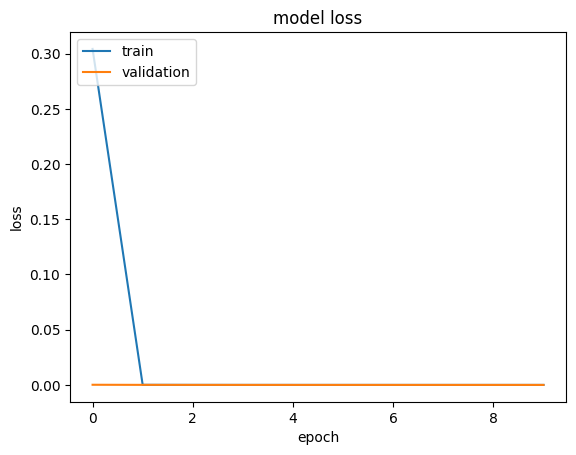

In [ ]:
tok = Tokenizer()
tok.fit_on_texts(cleaned_data)
# Adds 1 for padding.
VocabularySize = len(tok.word_index) + 1 

sequences = tok.texts_to_sequences(cleaned_data)
paddedSequences = pad_sequences(sequences, maxlen=sequenceLength, padding='post')
X = paddedSequences[:, :-1]
y = paddedSequences[:, -1] 

embeddingDimension = 10
sequenceLength = 12
batch_size = 32

# Use a train test split to create the testing and validation sets.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

# Build the Model.
model = tf.keras.Sequential([
    Embedding(input_dim=VocabularySize, output_dim=embeddingDimension, input_length=sequenceLength-1),
    LSTM(128, return_sequences=True),
    LSTM(64),
    Dense(64, activation='relu'),
    Dense(VocabularySize, activation='softmax')
])

# Uses SparseTopKCategoricalAccuracy for top-3 accuracy
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy', SparseTopKCategoricalAccuracy(k=3)])

model.summary()

history = model.fit(X_train, y_train, epochs=10, batch_size=batch_size, validation_data=(X_val, y_val))

print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Model 3

Uses the same data pre-processing from before but makes some parameter and model changes.

In [63]:
embeddingDimension = 100
sequenceLength = 30
batch_size = 32

tok = Tokenizer()
tok.fit_on_texts(cleaned_data)
VocabularySize = len(tok.word_index) + 1

# Convert text to sequences
sequences = tok.texts_to_sequences(cleaned_data)
paddedSequences = pad_sequences(sequences, maxlen=sequenceLength, padding='post')
X = paddedSequences[:, :-1]
y = paddedSequences[:, -1]

# Convert to NumPy arrays
X = np.array(X)
y = np.array(y)

# Check values before masking
print("Unique values in y before masking:", np.unique(y))

# Apply mask to filter out padding tokens
mask = y != 0
X = X[mask]
y = y[mask]

# Ensures samples are left after masking.
if len(X) == 0 or len(y) == 0:
    raise ValueError("No samples left after masking. Check your preprocessing or mask conditions.")

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

model = tf.keras.Sequential([
    Embedding(input_dim=VocabularySize, output_dim=embeddingDimension, input_length=sequenceLength-1),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(VocabularySize, activation='softmax')
])

# Define optimizer with modified learning rate
optimizer = Adam(learning_rate=0.00001)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy', SparseTopKCategoricalAccuracy(k=3)])

model.summary()

history = model.fit(X_train, y_train, epochs=10, batch_size=batch_size, validation_data=(X_val, y_val))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Unique values in y before masking: [0]


ValueError: No samples left after masking. Check your preprocessing or mask conditions.

# Next Word Prediction

We were trying to figure out what was wrong with our model and why it was so terrible. This didnt help but it was cool so I left it in.

In [ ]:
test_sentence = "and you know that will not be good either for you or for my god-daughter come"

# Tokenize and pad the sentence.
test_sequence = tok.texts_to_sequences([test_sentence])[0]
test_sequence = padSequences([test_sequence], maxlen=sequenceLength-1, padding='post')

# Predict the next word.
predicted_probs = model.predict(test_sequence)
predicted_word_index = np.argmax(predicted_probs)

# Convert the index to a word.
predicted_word = tok.index_word.get(predicted_word_index, "<unknown>")
print(f"Predicted next word: {predicted_word}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Predicted next word: <unknown>


# Model 4

Focus was on fixing the prediction issue of the model that we determined was in the pre-processing. we made the code more modular.

## Pre-Processing

In [65]:
def removeBoilerplate(text):
    """
    Removes the boilerplate from the text.
    """
    start_marker = r"\*\*\* START OF THE PROJECT GUTENBERG EBOOK.*?\*\*\*"
    end_marker = r"\*\*\* END OF THE PROJECT GUTENBERG EBOOK.*?\*\*\*"
    
    start_match = re.search(start_marker, text, re.IGNORECASE | re.DOTALL)
    end_match = re.search(end_marker, text, re.IGNORECASE | re.DOTALL)
    
    if start_match and end_match:
        clean_text = text[start_match.end():end_match.start()]
    else:
        clean_text = text 
    
    return clean_text.strip()

def extractChapters(text):
    """
    Extracts only the chapters from the text.
    """
    
    # Pattern to identify chapter titles - Uses regex extraction.
    chapter_pattern = r'chapter\s+(?:[ivxlcdm]+|\d+)\.\s*'
    
    matches = list(re.finditer(chapter_pattern, text, flags=re.IGNORECASE))
    
    chapters = []
    for i in range(len(matches)):
        start = matches[i].end()
        end = matches[i+1].start() if i+1 < len(matches) else len(text)
        chapter_text = text[start:end].strip()
        chapters.append(chapter_text)
    
    return chapters

def expand_text_contractions(text):
    """
    Expands contractions in the text.
    """
    return contractions.fix(text)

def convert_numbers(text):
    """
    Converts numerical digits into words.
    """
    def replace_num(match):
        num_str = match.group()
        try:
            # Convert the number to words.
            num_word = num2words(int(num_str))
            return num_word
        except:
            return num_str
    
    # Replace numerical digits with words.
    return re.sub(r'\b\d+\b', replace_num, text)

def remove_punctuation(text):
    """
    Removes punctuation from the text.
    """
    # Create a table that maps each punctuation character to null.
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

def clean_and_preprocess(text):
    """
    Cleaning and preprocessing steps.
    """
    
    # Lowercase.
    # Remove HTML tags.
    text = text.lower()
    text = BeautifulSoup(text, "html.parser").get_text()
    
    # Expand contractions.
    text = expand_text_contractions(text)
    
    # Convert numbers to words.
    text = convert_numbers(text)
    
    # Remove punctuation.
    text = remove_punctuation(text)
    
    # Remove any chapter titles within the chapter content.
    text = re.sub(r'chapter\s+\w+', '', text, flags=re.IGNORECASE)
    
    # Remove any whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

def preprocess_and_extractChapters(input_file, output_directory):
    """
    Reads the text and extracts preprocessed chapters.
    Saves them as separate files.
    """
    os.makedirs(output_directory, exist_ok=True)
    
    with open(input_file, 'r', encoding='utf-8') as file:
        data = file.read()
    
    data = removeBoilerplate(data)

    chapters = extractChapters(data)
    
    print(f"Total chapters extracted: {len(chapters)}")
    
    # Process each chapter
    for idx, chapter in enumerate(chapters, 1):
        cleaned_chapter = clean_and_preprocess(chapter)
        
        # Define the output file name.
        output_file = os.path.join(output_directory, f'chapter_{idx}.txt')
        
        # Save the cleaned chapter to a file.
        with open(output_file, 'w', encoding='utf-8') as f:
            f.write(cleaned_chapter)
        
        print(f"Saved Chapter {idx} to {output_file}")
    
    print("All chapters have been processed and saved.")

def display_sample_chapter(output_directory, chapter_number, num_chars=1000):
    """
    Displays the first characters of a specified chapter.
    """
    chapter_file = os.path.join(output_directory, f'chapter_{chapter_number}.txt')
    if not os.path.exists(chapter_file):
        print(f"Chapter {chapter_number} does not exist in {output_directory}.")
        return
    
    with open(chapter_file, 'r', encoding='utf-8') as file:
        cleaned_text = file.read()
        print(f"--- Chapter {chapter_number} Sample ---")
        print(cleaned_text[:num_chars])
        print(f"--- End of Chapter {chapter_number} Sample ---\n")

if __name__ == "__main__":
    input_file = 'pg766.txt' 
    output_directory = 'cleaned_chapters'
    preprocess_and_extractChapters(input_file, output_directory)
    display_sample_chapter(output_directory, 1) 


Total chapters extracted: 64
Saved Chapter 1 to cleaned_chapters\chapter_1.txt
Saved Chapter 2 to cleaned_chapters\chapter_2.txt
Saved Chapter 3 to cleaned_chapters\chapter_3.txt
Saved Chapter 4 to cleaned_chapters\chapter_4.txt
Saved Chapter 5 to cleaned_chapters\chapter_5.txt
Saved Chapter 6 to cleaned_chapters\chapter_6.txt
Saved Chapter 7 to cleaned_chapters\chapter_7.txt
Saved Chapter 8 to cleaned_chapters\chapter_8.txt
Saved Chapter 9 to cleaned_chapters\chapter_9.txt
Saved Chapter 10 to cleaned_chapters\chapter_10.txt
Saved Chapter 11 to cleaned_chapters\chapter_11.txt
Saved Chapter 12 to cleaned_chapters\chapter_12.txt
Saved Chapter 13 to cleaned_chapters\chapter_13.txt
Saved Chapter 14 to cleaned_chapters\chapter_14.txt
Saved Chapter 15 to cleaned_chapters\chapter_15.txt
Saved Chapter 16 to cleaned_chapters\chapter_16.txt
Saved Chapter 17 to cleaned_chapters\chapter_17.txt
Saved Chapter 18 to cleaned_chapters\chapter_18.txt
Saved Chapter 19 to cleaned_chapters\chapter_19.txt
S

## Model

Loading and concatenating cleaned chapters...
Total cleaned text length: 321757 characters
Preparing data...


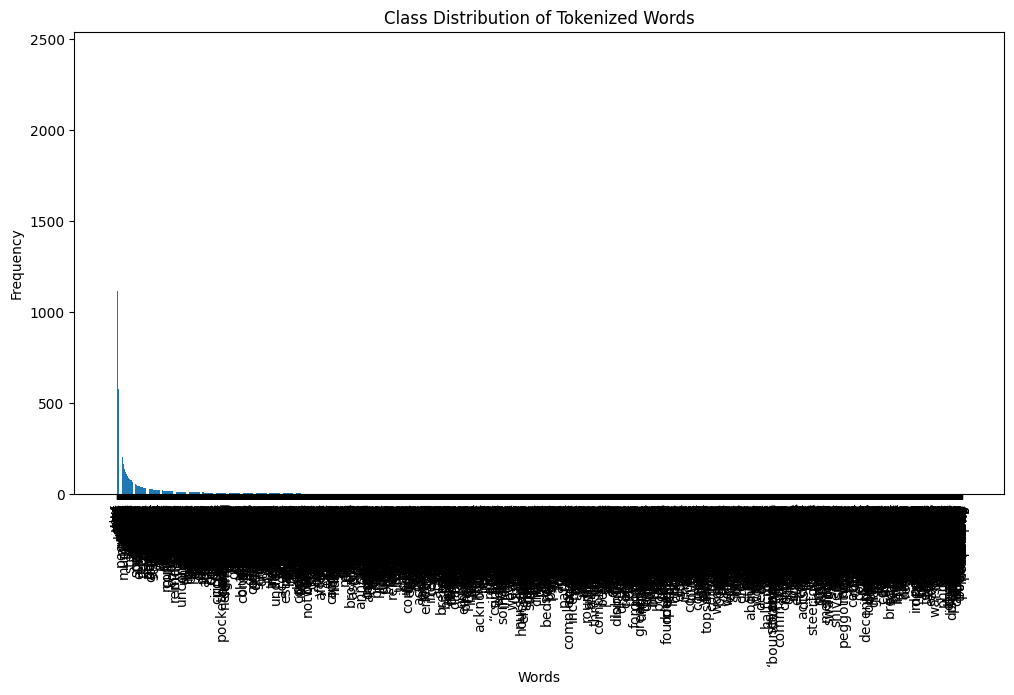

Total sequences: 62509
Target label distribution: Counter({np.int64(2): 2418, np.int64(3): 2249, np.int64(4): 2139, np.int64(5): 1630, np.int64(6): 1436, np.int64(7): 1420, np.int64(8): 1119, np.int64(9): 1039, np.int64(10): 973, np.int64(11): 890, np.int64(12): 870, np.int64(13): 663, np.int64(14): 616, np.int64(15): 585, np.int64(16): 576, np.int64(17): 550, np.int64(18): 548, np.int64(19): 541, np.int64(20): 528, np.int64(21): 492, np.int64(22): 480, np.int64(23): 473, np.int64(24): 444, np.int64(25): 441, np.int64(26): 428, np.int64(27): 400, np.int64(28): 359, np.int64(29): 356, np.int64(30): 352, np.int64(31): 323, np.int64(32): 317, np.int64(33): 309, np.int64(34): 276, np.int64(35): 264, np.int64(36): 262, np.int64(37): 256, np.int64(38): 255, np.int64(39): 246, np.int64(40): 240, np.int64(41): 236, np.int64(42): 232, np.int64(43): 231, np.int64(44): 227, np.int64(45): 222, np.int64(46): 221, np.int64(47): 218, np.int64(48): 204, np.int64(49): 201, np.int64(50): 186, np.int64(5

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_12 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Training the model...
Epoch 1/10
1759/1759 ━━━━━━━━━━━━━━━━━━━━ 32s 16ms/step - accuracy: 0.0361 - loss: 6.7865 - sparse_top_k_categorical_accuracy: 0.1026 - val_accuracy: 0.0515 - val_loss: 6.3840 - val_sparse_top_k_categorical_accuracy: 0.1229
Epoch 2/10
1759/1759 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - accuracy: 0.0595 - loss: 6.0898 - sparse_top_k_categorical_accuracy: 0.1395 - val_accuracy: 0.0657 - val_loss: 6.2422 - val_sparse_top_k_categorical_accuracy: 0.1657
Epoch 3/10
1759/1759 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - accuracy: 0.0844 - loss: 5.7469 - sparse_top_k_categorical_accuracy: 0.1784 - val_accuracy: 0.0931 - val_loss: 6.2057 - val_sparse_top_k_categorical_accuracy: 0.1845
Epoch 4/10
1759/1759 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - accuracy: 0.1039 - loss: 5.5210 - sparse_top_k_categorical_accuracy: 0.1993 - val_accuracy: 0.1027 - val_loss: 6.2401 - val_sparse_top_k_categorical_accuracy: 0.1968
Epoch 5/10
1759/1759 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - accuracy: 0.1136 - loss:

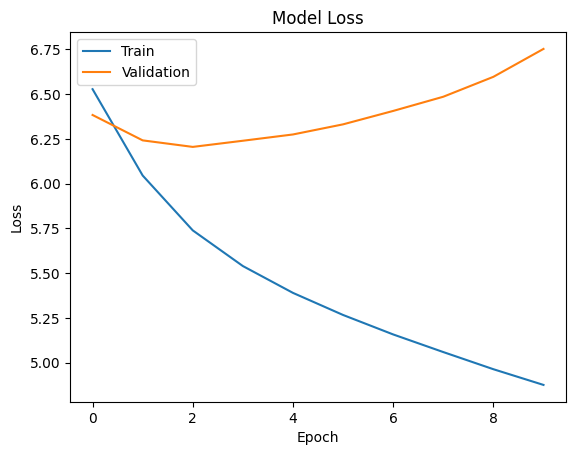

In [67]:
def plot_tok_class_distribution(tok):
    """
    Plots the class distribution from the Tokenizer.
    """
    word_counts = Counter(tok.word_counts)
    sorted_words = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))
    
    # Plot class distribution
    plt.figure(figsize=(12, 6))
    plt.bar(sorted_words.keys(), sorted_words.values())
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.title("Class Distribution of Tokenized Words")
    plt.xticks(rotation=90)
    plt.show()

def load_cleaned_chapters(output_directory):
    """
    Sorts the first defined chapers and concatenates them into a single string.
    """
    cleaned_text = ""
    chapter_files = sorted([
        f for f in os.listdir(output_directory)
        if f.startswith('chapter_') and f.endswith('.txt')
    ], key=lambda x: int(re.findall(r'chapter_(\d+)\.txt', x)[0]))[:10]
    # Load the first 10 chapters.
    
    for filename in chapter_files:
        filepath = os.path.join(output_directory, filename)
        with open(filepath, 'r', encoding='utf-8') as file:
            chapter = file.read()
            cleaned_text += chapter + " "

    return cleaned_text.strip()

def tokenize_text(cleaned_data, oov_token='<UNK>'):
    """
    Tokenizes the cleaned text.
    """
    tok = Tokenizer(oov_token=oov_token)
    tok.fit_on_texts([cleaned_data])
    VocabularySize = len(tok.word_index) + 1 
    sequence = tok.texts_to_sequences([cleaned_data])[0]
    plot_tok_class_distribution(tok)
    
    return tok, VocabularySize, sequence

def generate_sequences(sequence, sequenceLength):
    """
    Generates input-output pairs uses a sliding window approach.
    """
    sequences = []
    labels = []
    for i in range(sequenceLength, len(sequence)):
        seq = sequence[i-sequenceLength:i]
        label = sequence[i]
        sequences.append(seq)
        labels.append(label)
    return sequences, labels

def filter_sequences(X, y, padding_token=0):
    """
    Filters out sequences where the label is equal to the token.
    """
    mask = y != padding_token
    X_filtered = X[mask]
    y_filtered = y[mask]
    return X_filtered, y_filtered

def prepare_data(cleaned_data, sequenceLength=30, oov_token='<UNK>'):
    """
    Tokenization, sequence generation, and data splitting.
    """
    # Tokenize the text
    tok, VocabularySize, sequence = tokenize_text(cleaned_data, oov_token=oov_token)
    
    # Generate input-output pairs
    sequences, labels = generate_sequences(sequence, sequenceLength)
    
    # Convert to NumPy arrays
    X = np.array(sequences)
    y = np.array(labels)
    
    print(f"Total sequences: {len(X)}")
    
    # Inspect the distribution of y
    counter = Counter(y)
    print("Target label distribution:", counter)
    
    X_filtered, y_filtered = filter_sequences(X, y, padding_token=0)
    
    print(f"Sequences after filtering: {len(X_filtered)}")
    
    if len(X_filtered) == 0:
        raise ValueError("No sequences left after filtering. Adjust the sequenceLength or check the tokenization.")
    
    X_train, X_val, y_train, y_val = train_test_split(
        X_filtered, y_filtered, test_size=0.1, random_state=42
    )
    
    print(f"Training samples: {len(X_train)}, Validation samples: {len(X_val)}")
    
    return tok, VocabularySize, X_train, X_val, y_train, y_val

def build_model(VocabularySize, sequenceLength, embeddingDimension=30):
    """
    Builds and compiles the Sequential model.
    """
    model = Sequential([
        Embedding(input_dim=VocabularySize, output_dim=embeddingDimension, input_length=sequenceLength, mask_zero=True),
        LSTM(128, return_sequences=True),
        LSTM(64),
        Dense(64, activation='relu'),
        Dense(VocabularySize, activation='softmax')
    ])
    
    optimizer = Adam(learning_rate=0.001)
    
    # Compiles the model without Precision and Recall
    model.compile(
        optimizer=optimizer, 
        loss='sparse_categorical_crossentropy', 
        metrics=['accuracy', SparseTopKCategoricalAccuracy(k=3)]
    )
    model.summary()
    
    return model

def train_model(model, X_train, y_train, X_val, y_val, batch_size=32, epochs=10):
    """
    Trains the model.
    """

    history = model.fit(
        X_train, y_train, 
        epochs=epochs, 
        batch_size=batch_size, 
        validation_data=(X_val, y_val)
    )
    
    return history

def main():
    # Define directories and parameters
    input_directory = 'cleaned_chapters'
    output_directory = 'processed_data'
    
    sequenceLength = 30       
    embeddingDimension = 30 
    batch_size = 32
    epochs = 10
    
    if not os.path.exists(input_directory):
        raise FileNotFoundError(f"The directory '{input_directory}' does not exist. Please check the path.")
    
    print("Loading and concatenating cleaned chapters...")
    cleaned_data = load_cleaned_chapters(input_directory)
    print(f"Total cleaned text length: {len(cleaned_data)} characters")
    
    print("Preparing data...")
    tok, VocabularySize, X_train, X_val, y_train, y_val = prepare_data(
        cleaned_data, sequenceLength=sequenceLength, oov_token='<UNK>'
    )
    
    with open('tok_model_4.pickle', 'wb') as handle:
        import pickle
        pickle.dump(tok, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print("Tokenizer has been saved to 'tok_model_4.pickle'")
    
    # Build and train the model
    print("Building the model...")
    model = build_model(VocabularySize, sequenceLength, embeddingDimension=embeddingDimension)
    print("Training the model...")
    history = train_model(model, X_train, y_train, X_val, y_val, batch_size=batch_size, epochs=epochs)
    print("Model training complete.")
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

if __name__ == "__main__":
    main()
    


# Model 5

In [68]:
def removeBoilerplate(text):
    """
    Removes the boilerplate from the text.
    """
    start_marker = r"\*\*\* START OF THE PROJECT GUTENBERG EBOOK.*?\*\*\*"
    end_marker = r"\*\*\* END OF THE PROJECT GUTENBERG EBOOK.*?\*\*\*"
    
    start_match = re.search(start_marker, text, re.IGNORECASE | re.DOTALL)
    end_match = re.search(end_marker, text, re.IGNORECASE | re.DOTALL)
    
    if start_match and end_match:
        clean_text = text[start_match.end():end_match.start()]
    else:
        clean_text = text 
    
    return clean_text.strip()

def extractChapters(text):
    """
    Extracts only the chapters from the text.
    """
    
    # Pattern to identify chapter titles - Uses regex extraction.
    chapter_pattern = r'chapter\s+(?:[ivxlcdm]+|\d+)\.\s*'
    
    matches = list(re.finditer(chapter_pattern, text, flags=re.IGNORECASE))
    
    chapters = []
    for i in range(len(matches)):
        start = matches[i].end()
        end = matches[i+1].start() if i+1 < len(matches) else len(text)
        chapter_text = text[start:end].strip()
        chapters.append(chapter_text)
    
    return chapters

def expand_text_contractions(text):
    """
    Expands contractions in the text.
    """
    return contractions.fix(text)

def convert_numbers(text):
    """
    Converts numerical digits into words.
    """
    def replace_num(match):
        num_str = match.group()
        try:
            # Convert the number to words.
            num_word = num2words(int(num_str))
            return num_word
        except:
            return num_str
    
    # Replace numerical digits with words.
    return re.sub(r'\b\d+\b', replace_num, text)

def remove_punctuation(text):
    """
    Removes punctuation from the text.
    """
    # Create a table that maps each punctuation character to null.
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

def clean_and_preprocess(text):
    """
    Cleaning and preprocessing steps.
    """
    
    # Lowercase.
    # Remove HTML tags.
    text = text.lower()
    text = BeautifulSoup(text, "html.parser").get_text()
    
    # Expand contractions.
    text = expand_text_contractions(text)
    
    # Convert numbers to words.
    text = convert_numbers(text)
    
    # Remove punctuation.
    text = remove_punctuation(text)
    
    # Remove any chapter titles within the chapter content.
    text = re.sub(r'chapter\s+\w+', '', text, flags=re.IGNORECASE)
    
    # Remove any whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

def preprocess_and_extractChapters(input_file, output_directory):
    """
    Reads the text and extracts preprocessed chapters.
    Saves them as separate files.
    """
    os.makedirs(output_directory, exist_ok=True)
    
    with open(input_file, 'r', encoding='utf-8') as file:
        data = file.read()
    
    data = removeBoilerplate(data)

    chapters = extractChapters(data)
    
    print(f"Total chapters extracted: {len(chapters)}")
    
    # Process each chapter
    for idx, chapter in enumerate(chapters, 1):
        cleaned_chapter = clean_and_preprocess(chapter)
        
        # Define the output file name.
        output_file = os.path.join(output_directory, f'chapter_{idx}.txt')
        
        # Save the cleaned chapter to a file.
        with open(output_file, 'w', encoding='utf-8') as f:
            f.write(cleaned_chapter)
        
        print(f"Saved Chapter {idx} to {output_file}")
    
    print("All chapters have been processed and saved.")

def display_sample_chapter(output_directory, chapter_number, num_chars=1000):
    """
    Displays the first characters of a specified chapter.
    """
    chapter_file = os.path.join(output_directory, f'chapter_{chapter_number}.txt')
    if not os.path.exists(chapter_file):
        print(f"Chapter {chapter_number} does not exist in {output_directory}.")
        return
    
    with open(chapter_file, 'r', encoding='utf-8') as file:
        cleaned_text = file.read()
        print(f"--- Chapter {chapter_number} Sample ---")
        print(cleaned_text[:num_chars])
        print(f"--- End of Chapter {chapter_number} Sample ---\n")

if __name__ == "__main__":
    input_file = 'pg766.txt' 
    output_directory = 'cleaned_chapters'
    preprocess_and_extractChapters(input_file, output_directory)
    display_sample_chapter(output_directory, 1) 



Total chapters extracted: 64
Saved Chapter 1 to cleaned_chapters\chapter_1.txt
Saved Chapter 2 to cleaned_chapters\chapter_2.txt
Saved Chapter 3 to cleaned_chapters\chapter_3.txt
Saved Chapter 4 to cleaned_chapters\chapter_4.txt
Saved Chapter 5 to cleaned_chapters\chapter_5.txt
Saved Chapter 6 to cleaned_chapters\chapter_6.txt
Saved Chapter 7 to cleaned_chapters\chapter_7.txt
Saved Chapter 8 to cleaned_chapters\chapter_8.txt
Saved Chapter 9 to cleaned_chapters\chapter_9.txt
Saved Chapter 10 to cleaned_chapters\chapter_10.txt
Saved Chapter 11 to cleaned_chapters\chapter_11.txt
Saved Chapter 12 to cleaned_chapters\chapter_12.txt
Saved Chapter 13 to cleaned_chapters\chapter_13.txt
Saved Chapter 14 to cleaned_chapters\chapter_14.txt
Saved Chapter 15 to cleaned_chapters\chapter_15.txt
Saved Chapter 16 to cleaned_chapters\chapter_16.txt
Saved Chapter 17 to cleaned_chapters\chapter_17.txt
Saved Chapter 18 to cleaned_chapters\chapter_18.txt
Saved Chapter 19 to cleaned_chapters\chapter_19.txt
S

## Model

Loading and concatenating cleaned chapters...
Total cleaned text length: 88838 characters
Preparing data...


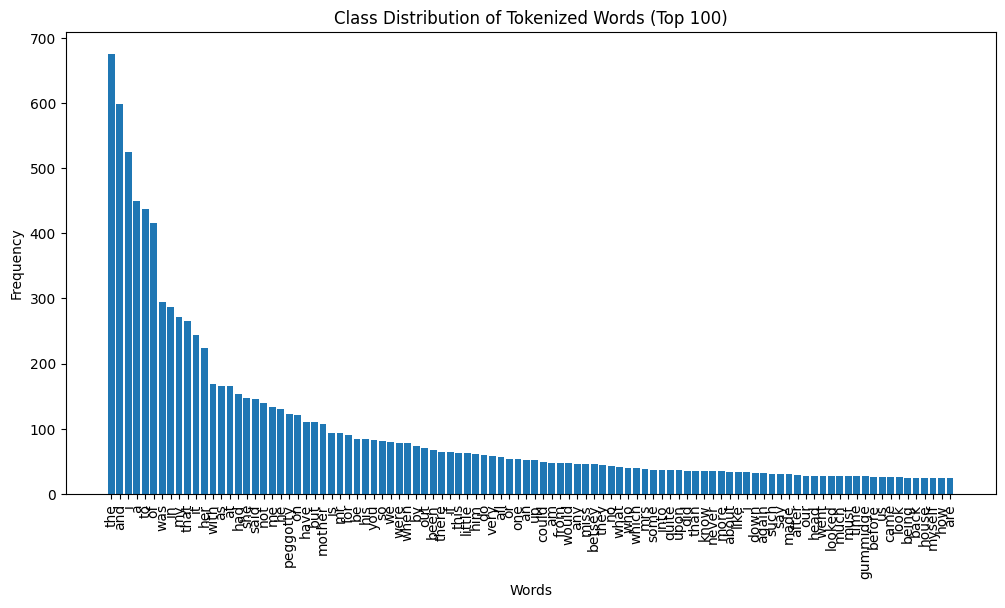

Total sequences: 17126
Sequences after filtering: 17126
Number of rare words: 2373
Number of sequences containing rare words: 17036
Total sequences after oversampling: 187486
Training samples: 168737, Validation samples: 18749
Tokenizer has been saved to 'tok.pickle'
Building the model...


C:\Users\Harry\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_18 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_19 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Training the model...
Epoch 1/20
5274/5274 ━━━━━━━━━━━━━━━━━━━━ 129s 24ms/step - accuracy: 0.0709 - loss: 5.9032 - sparse_top_k_categorical_accuracy: 0.1522 - val_accuracy: 0.1710 - val_loss: 4.4779 - val_sparse_top_k_categorical_accuracy: 0.2930
Epoch 2/20
5274/5274 ━━━━━━━━━━━━━━━━━━━━ 131s 25ms/step - accuracy: 0.2209 - loss: 4.0649 - sparse_top_k_categorical_accuracy: 0.3438 - val_accuracy: 0.3373 - val_loss: 3.1579 - val_sparse_top_k_categorical_accuracy: 0.4704
Epoch 3/20
5274/5274 ━━━━━━━━━━━━━━━━━━━━ 130s 25ms/step - accuracy: 0.3999 - loss: 2.7161 - sparse_top_k_categorical_accuracy: 0.5486 - val_accuracy: 0.5280 - val_loss: 2.0105 - val_sparse_top_k_categorical_accuracy: 0.6917
Epoch 4/20
5274/5274 ━━━━━━━━━━━━━━━━━━━━ 123s 23ms/step - accuracy: 0.5981 - loss: 1.6780 - sparse_top_k_categorical_accuracy: 0.7544 - val_accuracy: 0.6947 - val_loss: 1.2503 - val_sparse_top_k_categorical_accuracy: 0.8298
Epoch 5/20
5274/5274 ━━━━━━━━━━━━━━━━━━━━ 122s 23ms/step - accuracy: 0.7478 - 

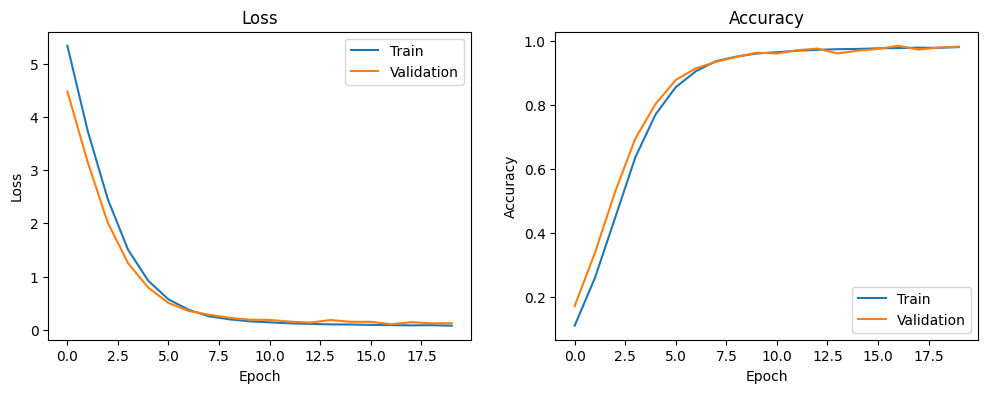

In [73]:
def plot_tok_class_distribution(tok):
    """
    Plots the class distribution from the Tokenizer.
    """
    word_counts = tok.word_counts
    
    # Sort words by frequency for clearer plotting.
    sorted_words = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))
    
    # Plot class distribution
    plt.figure(figsize=(12, 6))
    plt.bar(list(sorted_words.keys())[:100], list(sorted_words.values())[:100])
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.title("Class Distribution of Tokenized Words (Top 100)")
    plt.xticks(rotation=90)
    plt.show()

def load_cleaned_chapters(output_directory):
    """
    Sorts the first defined chapers and concatenates them into a single string.
    """
    cleaned_text = ""
    chapter_files = sorted([
        f for f in os.listdir(output_directory)
        if f.startswith('chapter_') and f.endswith('.txt')
    ], key=lambda x: int(re.findall(r'chapter_(\d+)\.txt', x)[0]))[:3]
    
    for filename in chapter_files:
        filepath = os.path.join(output_directory, filename)
        with open(filepath, 'r', encoding='utf-8') as file:
            chapter = file.read()
            cleaned_text += chapter + " " 
    
    return cleaned_text.strip()

def tokenize_text(cleaned_data, oov_token='<UNK>'):
    """
    Tokenizes the cleaned text.
    """
    tok = Tokenizer(oov_token=oov_token)
    tok.fit_on_texts([cleaned_data])
    VocabularySize = len(tok.word_index) + 1
    
    sequence = tok.texts_to_sequences([cleaned_data])[0]
    
    plot_tok_class_distribution(tok)
    
    return tok, VocabularySize, sequence

def generate_sequences(sequence, sequenceLength):
    """
    Generates input-output pairs using sliding window.
    """
    sequences = []
    labels = []
    for i in range(sequenceLength, len(sequence)):
        seq = sequence[i-sequenceLength:i]
        label = sequence[i]
        sequences.append(seq)
        labels.append(label)
    return sequences, labels

def filter_sequences(X, y, padding_token=0):
    """
    Filters out sequences.
    """
    mask = y != padding_token
    X_filtered = X[mask]
    y_filtered = y[mask]
    return X_filtered, y_filtered

def oversample_sequences(X, y, tok, rare_word_threshold=2, oversampling_factor=5):
    """
    Oversamples sequences that contain rare words.
    """
    word_counts = tok.word_counts
    
    # Identify rare words
    rare_words = {word for word, count in word_counts.items() if count <= rare_word_threshold}
    rare_word_indices = {tok.word_index[word] for word in rare_words if word in tok.word_index}
    
    print(f"Number of rare words: {len(rare_word_indices)}")
    
    # Identify sequences contain  rare words.
    sequences_containing_rare_words = []
    labels_for_rare_sequences = []
    for idx, seq in enumerate(X):
        if any(word in rare_word_indices for word in seq):
            sequences_containing_rare_words.append(seq)
            labels_for_rare_sequences.append(y[idx])
    
    print(f"Number of sequences containing rare words: {len(sequences_containing_rare_words)}")
    
    # Oversample the sequences
    X_oversampled = np.concatenate([X] + [sequences_containing_rare_words] * oversampling_factor)
    y_oversampled = np.concatenate([y] + [labels_for_rare_sequences] * oversampling_factor)
    
    print(f"Total sequences after oversampling: {len(X_oversampled)}")
    
    return X_oversampled, y_oversampled

def prepare_data(cleaned_data, sequenceLength=30, oov_token='<UNK>', rare_word_threshold=2, oversampling_factor=5):
    """
    Tokenization, sequence generation, oversampling, and data splitting.
    """
    tok, VocabularySize, sequence = tokenize_text(cleaned_data, oov_token=oov_token)
    sequences, labels = generate_sequences(sequence, sequenceLength)
    X = np.array(sequences)
    y = np.array(labels)
    print(f"Total sequences: {len(X)}")
    
    # Filter out some sequences.
    X_filtered, y_filtered = filter_sequences(X, y, padding_token=0)
    
    print(f"Sequences after filtering: {len(X_filtered)}")
    
    # Oversample sequences containing rare words
    X_oversampled, y_oversampled = oversample_sequences(
        X_filtered, y_filtered, tok, 
        rare_word_threshold=rare_word_threshold, 
        oversampling_factor=oversampling_factor
    )
    
    # Shuffle the data.
    from sklearn.utils import shuffle
    X_shuffled, y_shuffled = shuffle(X_oversampled, y_oversampled, random_state=42)
    
    X_train, X_val, y_train, y_val = train_test_split(
        X_shuffled, y_shuffled, test_size=0.1, random_state=42
    )
    
    print(f"Training samples: {len(X_train)}, Validation samples: {len(X_val)}")
    
    return tok, VocabularySize, X_train, X_val, y_train, y_val

def build_model(VocabularySize, sequenceLength, embeddingDimension=100):
    """
    Builds and compiles the Sequential model.
    """
    model = Sequential([
        Embedding(input_dim=VocabularySize, output_dim=embeddingDimension, input_length=sequenceLength),
        LSTM(128, return_sequences=True),
        LSTM(64),
        Dense(64, activation='relu'),
        Dense(VocabularySize, activation='softmax')
    ])
    optimizer = Adam(learning_rate=0.001)
    
    model.compile(
        optimizer=optimizer, 
        loss='sparse_categorical_crossentropy', 
        metrics=['accuracy', SparseTopKCategoricalAccuracy(k=3)]
    )
    model.summary()
    
    return model

def train_model(model, X_train, y_train, X_val, y_val, batch_size=64, epochs=20):
    """
    Trains the model.
    """
    history = model.fit(
        X_train, y_train, 
        epochs=epochs, 
        batch_size=batch_size, 
        validation_data=(X_val, y_val),
    )

    return history
    

def main():
    input_directory = 'cleaned_chapters' 
    sequenceLength = 30 
    embeddingDimension = 750                
    batch_size = 32
    epochs = 20
    rare_word_threshold = 2 
    oversampling_factor = 10
    
    if not os.path.exists(input_directory):
        raise FileNotFoundError(f"The directory '{input_directory}' does not exist. Please check the path.")
    print("Loading and concatenating cleaned chapters...")
    cleaned_data = load_cleaned_chapters(input_directory)
    print(f"Total cleaned text length: {len(cleaned_data)} characters")
    print("Preparing data...")
    tok, VocabularySize, X_train, X_val, y_train, y_val = prepare_data(
        cleaned_data, 
        sequenceLength=sequenceLength, 
        oov_token='<UNK>',
        rare_word_threshold=rare_word_threshold,
        oversampling_factor=oversampling_factor
    )
    with open('tok.pickle', 'wb') as handle:
        pickle.dump(tok, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print("Tokenizer has been saved to 'tok.pickle'")
    
    print("Building the model...")
    model = build_model(VocabularySize, sequenceLength, embeddingDimension=embeddingDimension)
    print("Training the model...")
    history = train_model(model, X_train, y_train, X_val, y_val, batch_size=batch_size, epochs=epochs)
    print("Model training complete.")
    plt.figure(figsize=(12, 4))
    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
if __name__ == "__main__":
    main()


## Sampling Graphs and FPS Calculation

These were just used to gather statistics for the best model (Model 5) - No code comments have been included except for the relevant sections.

Loading and concatenating cleaned chapters...
Total cleaned text length: 88838 characters
Preparing data and generating sampling graphs...


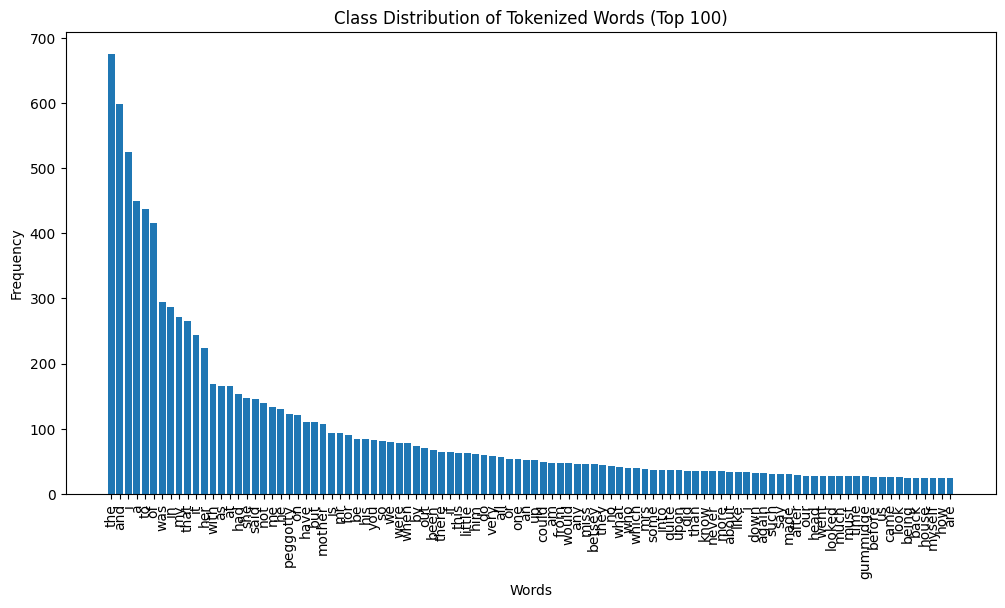

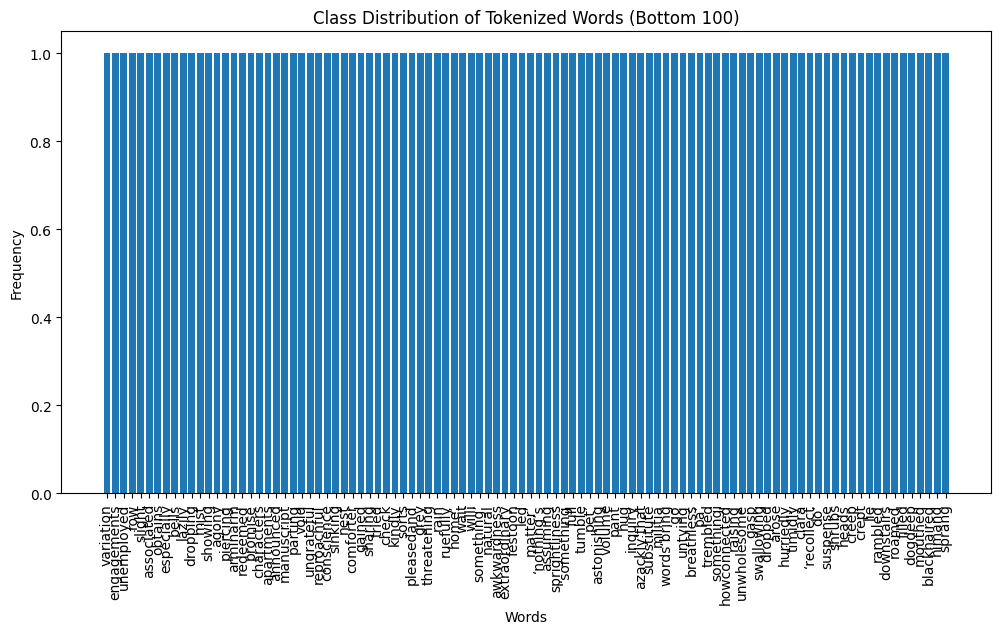

Total sequences: 17126
Sequences after filtering: 17126
Number of rare words: 2373
Number of sequences containing rare words: 17036
Total sequences after oversampling: 187486


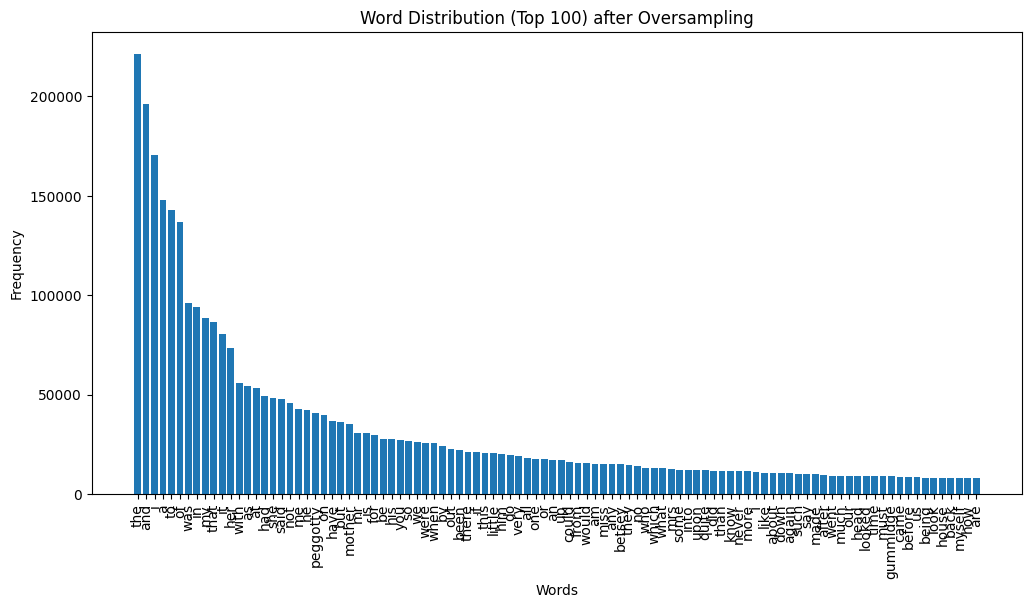

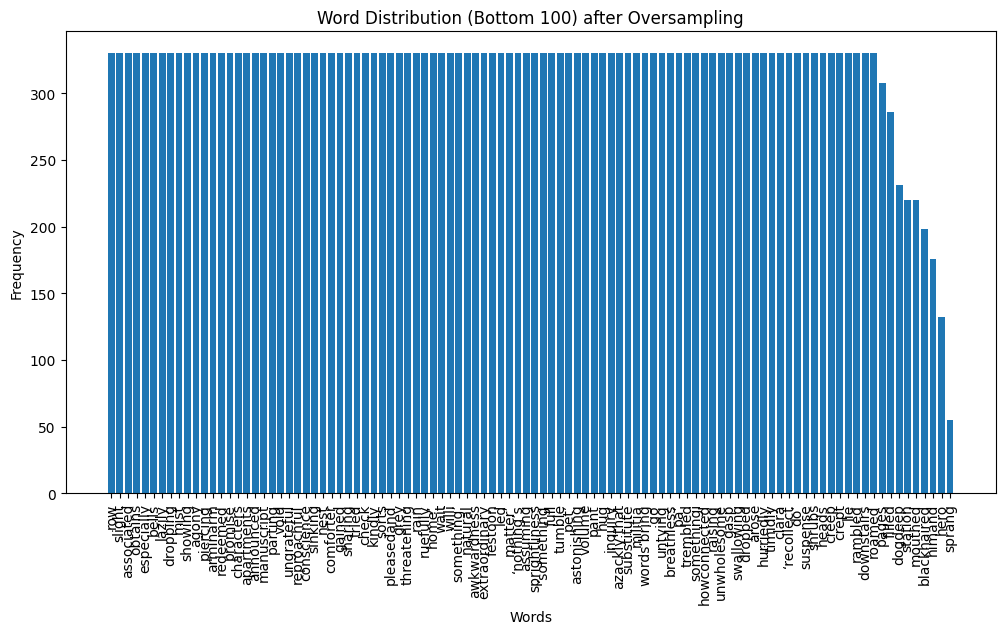

Training samples: 168737, Validation samples: 18749
Tokenizer has been saved to 'tok.pickle'


In [ ]:
def plot_tok_class_distribution(tok):
    word_counts = tok.word_counts
    sorted_words = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))
    plt.figure(figsize=(12, 6))
    plt.bar(list(sorted_words.keys())[:100], list(sorted_words.values())[:100])
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.title("Class Distribution of Tokenized Words (Top 100)")
    plt.xticks(rotation=90)
    plt.show()

    # Plot bottom 100 words
    plt.figure(figsize=(12, 6))
    plt.bar(list(sorted_words.keys())[-100:], list(sorted_words.values())[-100:])
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.title("Class Distribution of Tokenized Words (Bottom 100)")
    plt.xticks(rotation=90)
    plt.show()

def plot_word_distribution_from_sequences(X, tok, title="Word Distribution", top_n=100):
    word_indices = X.flatten()
    counts = Counter(word_indices)
    word_counts = {}
    for idx, count in counts.items():
        word = tok.index_word.get(idx, '<UNK>')
        word_counts[word] = count
    sorted_word_counts = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))
    # Plot top N words
    plt.figure(figsize=(12, 6))
    plt.bar(list(sorted_word_counts.keys())[:top_n], list(sorted_word_counts.values())[:top_n])
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.title(f"Word Distribution (Top {top_n}) after Oversampling")
    plt.xticks(rotation=90)
    plt.show()
    # Plot bottom N words
    bottom_n = top_n
    plt.figure(figsize=(12, 6))
    plt.bar(list(sorted_word_counts.keys())[-bottom_n:], list(sorted_word_counts.values())[-bottom_n:])
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.title(f"Word Distribution (Bottom {bottom_n}) after Oversampling")
    plt.xticks(rotation=90)
    plt.show()
    
def load_cleaned_chapters(output_directory):
    cleaned_text = ""
    chapter_files = sorted([
        f for f in os.listdir(output_directory)
        if f.startswith('chapter_') and f.endswith('.txt')
    ], key=lambda x: int(re.findall(r'chapter_(\d+)\.txt', x)[0]))[:3]
    
    for filename in chapter_files:
        filepath = os.path.join(output_directory, filename)
        with open(filepath, 'r', encoding='utf-8') as file:
            chapter = file.read()
            cleaned_text += chapter + " "
    
    return cleaned_text.strip()
    
def tokenize_text(cleaned_data, oov_token='<UNK>'):
    tok = Tokenizer(oov_token=oov_token)
    tok.fit_on_texts([cleaned_data])
    VocabularySize = len(tok.word_index) + 1
    sequence = tok.texts_to_sequences([cleaned_data])[0]
    
    plot_tok_class_distribution(tok)
    
    return tok, VocabularySize, sequence

def generate_sequences(sequence, sequenceLength):
    sequences = []
    labels = []
    for i in range(sequenceLength, len(sequence)):
        seq = sequence[i-sequenceLength:i]
        label = sequence[i]
        sequences.append(seq)
        labels.append(label)
    return sequences, labels

def filter_sequences(X, y, padding_token=0):
    mask = y != padding_token
    X_filtered = X[mask]
    y_filtered = y[mask]
    return X_filtered, y_filtered

def oversample_sequences(X, y, tok, rare_word_threshold=2, oversampling_factor=5):
    word_counts = tok.word_counts
    rare_words = {word for word, count in word_counts.items() if count <= rare_word_threshold}
    rare_word_indices = {tok.word_index[word] for word in rare_words if word in tok.word_index}
    print(f"Number of rare words: {len(rare_word_indices)}")
    sequences_containing_rare_words = []
    labels_for_rare_sequences = []
    for idx, seq in enumerate(X):
        if any(word in rare_word_indices for word in seq):
            sequences_containing_rare_words.append(seq)
            labels_for_rare_sequences.append(y[idx])
    
    print(f"Number of sequences containing rare words: {len(sequences_containing_rare_words)}")
    # Oversample the sequences
    X_oversampled = np.concatenate([X] + [sequences_containing_rare_words] * oversampling_factor)
    y_oversampled = np.concatenate([y] + [labels_for_rare_sequences] * oversampling_factor)
    
    print(f"Total sequences after oversampling: {len(X_oversampled)}")
    
    return X_oversampled, y_oversampled

def prepare_data(cleaned_data, sequenceLength=30, oov_token='<UNK>', rare_word_threshold=2, oversampling_factor=5):
    tok, VocabularySize, sequence = tokenize_text(cleaned_data, oov_token=oov_token)
    sequences, labels = generate_sequences(sequence, sequenceLength)
    X = np.array(sequences)
    y = np.array(labels)
    
    print(f"Total sequences: {len(X)}")
    X_filtered, y_filtered = filter_sequences(X, y, padding_token=0)
    
    print(f"Sequences after filtering: {len(X_filtered)}")

    X_oversampled, y_oversampled = oversample_sequences(
        X_filtered, y_filtered, tok, 
        rare_word_threshold=rare_word_threshold, 
        oversampling_factor=oversampling_factor
    )

    plot_word_distribution_from_sequences(X_oversampled, tok, title="Word Distribution after Oversampling", top_n=100)
    X_shuffled, y_shuffled = shuffle(X_oversampled, y_oversampled, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(
        X_shuffled, y_shuffled, test_size=0.1, random_state=42
    )
    
    print(f"Training samples: {len(X_train)}, Validation samples: {len(X_val)}")
    
    return tok, VocabularySize, X_train, X_val, y_train, y_val

def build_model(VocabularySize, sequenceLength, embeddingDimension=100):
    model = Sequential([
        Embedding(input_dim=VocabularySize, output_dim=embeddingDimension, input_length=sequenceLength),
        LSTM(128, return_sequences=True),
        LSTM(64),
        Dense(64, activation='relu'),
        Dense(VocabularySize, activation='softmax')
    ])
    
    optimizer = Adam(learning_rate=0.001)
    model.compile(
        optimizer=optimizer, 
        loss='sparse_categorical_crossentropy', 
        metrics=['accuracy', SparseTopKCategoricalAccuracy(k=3)]
    )
    model.summary()
    
    return model

def train_model(model, X_train, y_train, X_val, y_val, batch_size=64, epochs=20):
    history = model.fit(        X_train, y_train, 
        epochs=epochs, 
        batch_size=batch_size, 
        validation_data=(X_val, y_val),
    )

    return history

def main():
    input_directory = 'cleaned_chapters'
    sequenceLength = 30 
    rare_word_threshold = 2 
    oversampling_factor = 10 
    if not os.path.exists(input_directory):
        raise FileNotFoundError(f"The directory '{input_directory}' does not exist. Please check the path.")

    print("Loading and concatenating cleaned chapters...")
    cleaned_data = load_cleaned_chapters(input_directory)
    print(f"Total cleaned text length: {len(cleaned_data)} characters")

    print("Preparing data and generating sampling graphs...")
    tok, VocabularySize, X_train, X_val, y_train, y_val = prepare_data(
        cleaned_data, 
        sequenceLength=sequenceLength, 
        oov_token='<UNK>',
        rare_word_threshold=rare_word_threshold,
        oversampling_factor=oversampling_factor
    )

    with open('tok.pickle', 'wb') as handle:
        pickle.dump(tok, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print("Tokenizer has been saved to 'tok.pickle'")
    
    # Sampling graphs have been generated in prepare_data; no model training is necessary.

if __name__ == "__main__":
    main()


In [ ]:
def load_cleaned_chapters(output_directory):
    cleaned_text = ""
    chapter_files = sorted([
        f for f in os.listdir(output_directory)
        if f.startswith('chapter_') and f.endswith('.txt')
    ], key=lambda x: int(re.findall(r'chapter_(\d+)\.txt', x)[0]))

    for filename in chapter_files:
        filepath = os.path.join(output_directory, filename)
        with open(filepath, 'r', encoding='utf-8') as file:
            chapter = file.read()
            cleaned_text += chapter + " " 

    return cleaned_text.strip()

def generate_sequences(sequence, sequenceLength):
    sequences = []
    labels = []
    for i in range(sequenceLength, len(sequence)):
        seq = sequence[i-sequenceLength:i]
        label = sequence[i]
        sequences.append(seq)
        labels.append(label)
    return sequences, labels

def filter_sequences(X, y, padding_token=0):
    mask = y != padding_token
    X_filtered = X[mask]
    y_filtered = y[mask]
    return X_filtered, y_filtered

def prepare_data(cleaned_data, tok, sequenceLength=30):
    sequence = tok.texts_to_sequences([cleaned_data])[0]
    sequences, labels = generate_sequences(sequence, sequenceLength)
    X = np.array(sequences)
    y = np.array(labels)
    X_filtered, y_filtered = filter_sequences(X, y, padding_token=0)
    from sklearn.utils import shuffle
    X_shuffled, y_shuffled = shuffle(X_filtered, y_filtered, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(
        X_shuffled, y_shuffled, test_size=0.1, random_state=42
    )

    return X_train, X_val, y_train, y_val

def measure_inference_fps_single(model, X_test, num_samples=100):
    """
    Measures the FPS of the model during inference, processing one sample at a time.
    """
    total_time = 0.0

    # Randomly select num_samples samples from X_test
    indices = np.random.choice(len(X_test), num_samples, replace=False)
    X_samples = X_test[indices]

    for x in X_samples:
        # Make it into a batch of size 1
        x = np.expand_dims(x, axis=0) 
        start_time = time.time()
        prediction = model.predict(x, verbose=0)
        end_time = time.time()
        inference_time = end_time - start_time
        total_time += inference_time

    avg_time_per_sample = (total_time / num_samples) * 1000
    fps = num_samples / total_time

    return fps, avg_time_per_sample

def main():
    model = tf.keras.models.load_model('best_model.keras')
    with open('tok.pickle', 'rb') as handle:
        tok = pickle.load(handle)
    if os.path.exists('X_val.npy') and os.path.exists('y_val.npy'):
        X_val = np.load('X_val.npy')
        y_val = np.load('y_val.npy')
    else:
        print("Loading and concatenating cleaned chapters...")
        cleaned_data = load_cleaned_chapters('cleaned_chapters')
        print(f"Total cleaned text length: {len(cleaned_data)} characters")
        print("Preparing data...")
        sequenceLength = 30
        _, X_val, _, y_val = prepare_data(
            cleaned_data,
            tok,
            sequenceLength=sequenceLength
        )
    print(f"Validation data shape: {X_val.shape}")
    # Measure FPS using single-sample processing
    fps, time_per_sample = measure_inference_fps_single(model, X_val, num_samples=100)

    print(f"Average FPS (samples per second): {fps:.2f}")
    print(f"Average time per sample: {time_per_sample:.2f} ms")

if __name__ == "__main__":
    main()


Loading and concatenating cleaned chapters...
Total cleaned text length: 1853212 characters
Preparing data...
Validation data shape: (35635, 30)
Average FPS (samples per second): 27.04
Average time per sample: 36.98 ms


# GRU

## Data Pre-processing

In [84]:
def removeBoilerplate(text):
    """
    Removes the boilerplate from the text.
    """
    start_marker = r"\*\*\* START OF THE PROJECT GUTENBERG EBOOK.*?\*\*\*"
    end_marker = r"\*\*\* END OF THE PROJECT GUTENBERG EBOOK.*?\*\*\*"
    
    start_match = re.search(start_marker, text, re.IGNORECASE | re.DOTALL)
    end_match = re.search(end_marker, text, re.IGNORECASE | re.DOTALL)
    
    if start_match and end_match:
        clean_text = text[start_match.end():end_match.start()]
    else:
        clean_text = text  # If markers not found, return original text
    
    return clean_text.strip()

def extractChapters(text):
    """
    Extracts the chapters from the text.
    """
    chapter_pattern = r'chapter\s+(?:[ivxlcdm]+|\d+)\.\s*'
    matches = list(re.finditer(chapter_pattern, text, flags=re.IGNORECASE))
    
    chapters = []
    for i in range(len(matches)):
        start = matches[i].end()
        end = matches[i+1].start() if i+1 < len(matches) else len(text)
        chapter_text = text[start:end].strip()
        chapters.append(chapter_text)
    
    return chapters

def expand_text_contractions(text):
    """
    Expands contractions.
    """
    return contractions.fix(text)

def convert_numbers(text):
    """
    Converts digits into their word equivalents.
    """
    def replace_num(match):
        num_str = match.group()
        try:
            num_word = num2words(int(num_str))
            return num_word
        except:
            return num_str
        
    return re.sub(r'\b\d+\b', replace_num, text)

def remove_punctuation(text):
    """
    Removes punctuation.
    """
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

def clean_and_preprocess(text):
    """
    Cleaning and preprocessing steps.
    """
    # Lowercase.
    # Remove HTML tags.
    text = text.lower()
    text = BeautifulSoup(text, "html.parser").get_text()
    
    # Expand contractions.
    text = expand_text_contractions(text)
    
    # Convert numbers.
    text = convert_numbers(text)
    
    # Remove punctuation.
    text = remove_punctuation(text)
    
    # Remove chapter titles.
    text = re.sub(r'chapter\s+\w+', '', text, flags=re.IGNORECASE)
      
    # Remove  whitespace.
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

def preprocess_and_extractChapters(input_file, output_directory):
    """
    Extracts chapters, preprocesses each chapter.
    """
    os.makedirs(output_directory, exist_ok=True)
    with open(input_file, 'r', encoding='utf-8') as file:
        data = file.read()
    data = removeBoilerplate(data)
    chapters = extractChapters(data)
    
    print(f"Total chapters extracted: {len(chapters)}")

    for idx, chapter in enumerate(chapters, 1):
        cleaned_chapter = clean_and_preprocess(chapter)
        output_file = os.path.join(output_directory, f'chapter_{idx}.txt')
        with open(output_file, 'w', encoding='utf-8') as f:
            f.write(cleaned_chapter)
        
        print(f"Saved Chapter {idx} to {output_file}")
    
    print("All chapters have been processed and saved.")

def display_sample_chapter(output_directory, chapter_number, num_chars=1000):
    """
    Displays the characters of a specified chapter.
    """
    chapter_file = os.path.join(output_directory, f'chapter_{chapter_number}.txt')
    if not os.path.exists(chapter_file):
        print(f"Chapter {chapter_number} does not exist in {output_directory}.")
        return
    
    with open(chapter_file, 'r', encoding='utf-8') as file:
        cleaned_text = file.read()
        print(f"--- Chapter {chapter_number} Sample ---")
        print(cleaned_text[:num_chars])
        print(f"--- End of Chapter {chapter_number} Sample ---\n")

if __name__ == "__main__":
    input_file = 'pg766.txt' 
    output_directory = 'cleaned_chapters' 
    preprocess_and_extractChapters(input_file, output_directory)
    display_sample_chapter(output_directory, 1)

Total chapters extracted: 64
Saved Chapter 1 to cleaned_chapters\chapter_1.txt
Saved Chapter 2 to cleaned_chapters\chapter_2.txt
Saved Chapter 3 to cleaned_chapters\chapter_3.txt
Saved Chapter 4 to cleaned_chapters\chapter_4.txt
Saved Chapter 5 to cleaned_chapters\chapter_5.txt
Saved Chapter 6 to cleaned_chapters\chapter_6.txt
Saved Chapter 7 to cleaned_chapters\chapter_7.txt
Saved Chapter 8 to cleaned_chapters\chapter_8.txt
Saved Chapter 9 to cleaned_chapters\chapter_9.txt
Saved Chapter 10 to cleaned_chapters\chapter_10.txt
Saved Chapter 11 to cleaned_chapters\chapter_11.txt
Saved Chapter 12 to cleaned_chapters\chapter_12.txt
Saved Chapter 13 to cleaned_chapters\chapter_13.txt
Saved Chapter 14 to cleaned_chapters\chapter_14.txt
Saved Chapter 15 to cleaned_chapters\chapter_15.txt
Saved Chapter 16 to cleaned_chapters\chapter_16.txt
Saved Chapter 17 to cleaned_chapters\chapter_17.txt
Saved Chapter 18 to cleaned_chapters\chapter_18.txt
Saved Chapter 19 to cleaned_chapters\chapter_19.txt
S

## Model

Loading and concatenating cleaned chapters...
Total cleaned text length: 88838 characters
Preparing data...


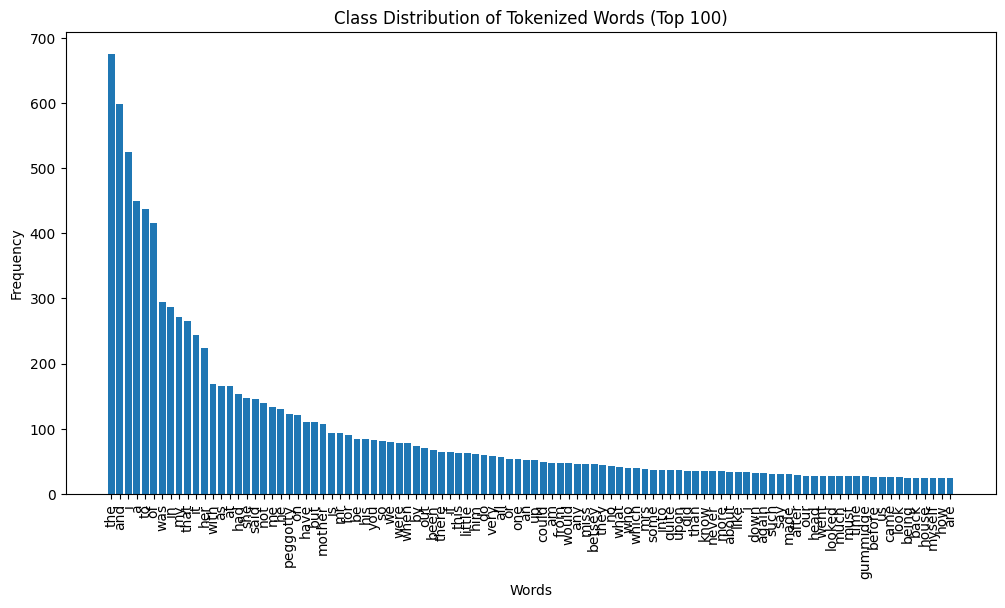

Total sequences: 17126
Sequences after filtering: 17126
Number of rare words: 2373
Number of sequences containing rare words: 17036
Total sequences after oversampling: 187486
Training samples: 168737, Validation samples: 18749
Tokenizer has been saved to 'tok.pickle'
Building the model...


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_12 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_4 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_5 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Training the model...
Epoch 1/20
5274/5274 ━━━━━━━━━━━━━━━━━━━━ 120s 22ms/step - accuracy: 0.0423 - loss: 6.1546 - sparse_top_k_categorical_accuracy: 0.1104 - val_accuracy: 0.0668 - val_loss: 5.6443 - val_sparse_top_k_categorical_accuracy: 0.1555
Epoch 2/20
5274/5274 ━━━━━━━━━━━━━━━━━━━━ 116s 22ms/step - accuracy: 0.0740 - loss: 5.5287 - sparse_top_k_categorical_accuracy: 0.1620 - val_accuracy: 0.0813 - val_loss: 5.4190 - val_sparse_top_k_categorical_accuracy: 0.1739
Epoch 3/20
5274/5274 ━━━━━━━━━━━━━━━━━━━━ 115s 22ms/step - accuracy: 0.0851 - loss: 5.3382 - sparse_top_k_categorical_accuracy: 0.1797 - val_accuracy: 0.0872 - val_loss: 5.3207 - val_sparse_top_k_categorical_accuracy: 0.1788
Epoch 4/20
5274/5274 ━━━━━━━━━━━━━━━━━━━━ 116s 22ms/step - accuracy: 0.0908 - loss: 5.2664 - sparse_top_k_categorical_accuracy: 0.1854 - val_accuracy: 0.0894 - val_loss: 5.3103 - val_sparse_top_k_categorical_accuracy: 0.1857
Epoch 5/20
5274/5274 ━━━━━━━━━━━━━━━━━━━━ 116s 22ms/step - accuracy: 0.0934 - 

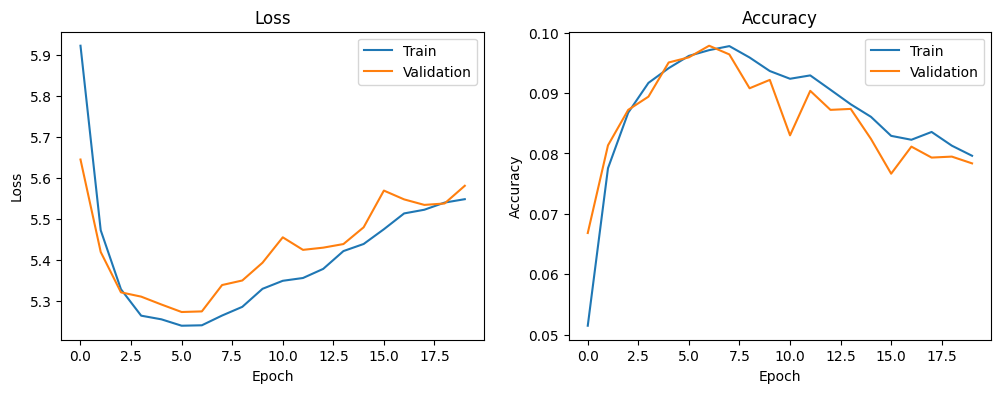

In [88]:
def plot_tok_class_distribution(tok):
    """
    Plots the class distribution from the Tokenizer.
    """
    word_counts = tok.word_counts
    sorted_words = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))

    # Plot class distribution
    plt.figure(figsize=(12, 6))
    plt.bar(list(sorted_words.keys())[:100], list(sorted_words.values())[:100])  # Plot top 50 words for readability
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.title("Class Distribution of Tokenized Words (Top 100)")
    plt.xticks(rotation=90)
    plt.show()

def load_cleaned_chapters(output_directory, num_chapters=3):
    """
    Reads the first few files from the specified directory and concatenates them into a single string.
    """
    cleaned_text = ""
    chapter_files = sorted([
        f for f in os.listdir(output_directory)
        if f.startswith('chapter_') and f.endswith('.txt')
    ], key=lambda x: int(re.findall(r'chapter_(\d+)\.txt', x)[0]))[:3]
    
    for filename in chapter_files:
        filepath = os.path.join(output_directory, filename)
        with open(filepath, 'r', encoding='utf-8') as file:
            chapter = file.read()
            cleaned_text += chapter + " "
    
    return cleaned_text.strip()

def tokenize_text(cleaned_data, oov_token='<UNK>'):
    """
    Tokenizes the cleaned text.
    """
    tok = Tokenizer(oov_token=oov_token)
    tok.fit_on_texts([cleaned_data])
    VocabularySize = len(tok.word_index) + 1
    sequence = tok.texts_to_sequences([cleaned_data])[0]
    
    plot_tok_class_distribution(tok)
    
    return tok, VocabularySize, sequence

def generate_sequences(sequence, sequenceLength):
    """
    Generates input-output pairs.
    """
    sequences = []
    labels = []
    for i in range(sequenceLength, len(sequence)):
        seq = sequence[i-sequenceLength:i]
        label = sequence[i]
        sequences.append(seq)
        labels.append(label)
    return sequences, labels

def filter_sequences(X, y, padding_token=0):
    """
    Filters out sequences.
    """
    mask = y != padding_token
    X_filtered = X[mask]
    y_filtered = y[mask]
    return X_filtered, y_filtered

def oversample_sequences(X, y, tok, rare_word_threshold=2, oversampling_factor=5):
    """
    Oversamples sequences that contain rare words.
    """
    word_counts = tok.word_counts
    rare_words = {word for word, count in word_counts.items() if count <= rare_word_threshold}
    rare_word_indices = {tok.word_index[word] for word in rare_words if word in tok.word_index}
    
    print(f"Number of rare words: {len(rare_word_indices)}")
    
    sequences_containing_rare_words = []
    labels_for_rare_sequences = []
    for idx, seq in enumerate(X):
        if any(word in rare_word_indices for word in seq):
            sequences_containing_rare_words.append(seq)
            labels_for_rare_sequences.append(y[idx])
    
    print(f"Number of sequences containing rare words: {len(sequences_containing_rare_words)}")
    
    X_oversampled = np.concatenate([X] + [sequences_containing_rare_words] * oversampling_factor)
    y_oversampled = np.concatenate([y] + [labels_for_rare_sequences] * oversampling_factor)
    
    print(f"Total sequences after oversampling: {len(X_oversampled)}")
    
    return X_oversampled, y_oversampled

def prepare_data(cleaned_data, sequenceLength=30, oov_token='<UNK>', rare_word_threshold=2, oversampling_factor=5):
    """
    Tokenization, sequence generation, oversampling, and data splitting.
    """
    tok, VocabularySize, sequence = tokenize_text(cleaned_data, oov_token=oov_token)
    
    sequences, labels = generate_sequences(sequence, sequenceLength)

    X = np.array(sequences)
    y = np.array(labels)
    
    print(f"Total sequences: {len(X)}")

    X_filtered, y_filtered = filter_sequences(X, y, padding_token=0)
    
    print(f"Sequences after filtering: {len(X_filtered)}")

    X_oversampled, y_oversampled = oversample_sequences(
        X_filtered, y_filtered, tok, 
        rare_word_threshold=rare_word_threshold, 
        oversampling_factor=oversampling_factor
    )

    from sklearn.utils import shuffle
    X_shuffled, y_shuffled = shuffle(X_oversampled, y_oversampled, random_state=42)

    X_train, X_val, y_train, y_val = train_test_split(
        X_shuffled, y_shuffled, test_size=0.1, random_state=42
    )
    
    print(f"Training samples: {len(X_train)}, Validation samples: {len(X_val)}")
    
    return tok, VocabularySize, X_train, X_val, y_train, y_val

def build_model(VocabularySize, sequenceLength, embeddingDimension=100):
    """
    Compiles the Sequential model.
    """
    model = Sequential([
        Embedding(input_dim=VocabularySize, output_dim=embeddingDimension, input_length=sequenceLength),
        GRU(128, return_sequences=True),
        GRU(64),
        Dense(64, activation='relu'),
        Dense(VocabularySize, activation='softmax')
    ])
    
    optimizer = Adam(learning_rate=0.005)

    model.compile(
        optimizer=optimizer, 
        loss='sparse_categorical_crossentropy', 
        metrics=['accuracy', SparseTopKCategoricalAccuracy(k=3)]
    )
    
    model.summary()
    
    return model

def train_model(model, X_train, y_train, X_val, y_val, batch_size=64, epochs=20):
    """
    Trains the model.
    """
    # Train the model with callbacks
    history = model.fit(
        X_train, y_train, 
        epochs=epochs, 
        batch_size=batch_size, 
        validation_data=(X_val, y_val),
    )

    return history

def main():
    input_directory = 'cleaned_chapters' 
    sequenceLength = 30                  
    embeddingDimension = 768             
    batch_size = 32
    epochs = 20
    rare_word_threshold = 2              
    oversampling_factor = 10         
    
    if not os.path.exists(input_directory):
        raise FileNotFoundError(f"The directory '{input_directory}' does not exist. Please check the path.")

    print("Loading and concatenating cleaned chapters...")
    cleaned_data = load_cleaned_chapters(input_directory)
    print(f"Total cleaned text length: {len(cleaned_data)} characters")
    
    print("Preparing data...")
    tok, VocabularySize, X_train, X_val, y_train, y_val = prepare_data(
        cleaned_data, 
        sequenceLength=sequenceLength, 
        oov_token='<UNK>',
        rare_word_threshold=rare_word_threshold,
        oversampling_factor=oversampling_factor
    )

    with open('tok.pickle', 'wb') as handle:
        pickle.dump(tok, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print("Tokenizer has been saved to 'tok.pickle'")

    print("Building the model...")
    model = build_model(VocabularySize, sequenceLength, embeddingDimension=embeddingDimension)

    print("Training the model...")
    history = train_model(model, X_train, y_train, X_val, y_val, batch_size=batch_size, epochs=epochs)
    
    print("Model training complete.")

    plt.figure(figsize=(12, 4))
    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
if __name__ == "__main__":
    main()


## FPS Calculation

In [90]:

def measure_inference_fps_single(model, X_test, num_samples=100):
    total_time = 0.0
    indices = np.random.choice(len(X_test), num_samples, replace=False)
    X_samples = X_test[indices]
    for x in X_samples:
        x = np.expand_dims(x, axis=0) 
        start_time = time.time()
        prediction = model.predict(x, verbose=0)
        end_time = time.time()
        inference_time = end_time - start_time
        total_time += inference_time
    avg_time_per_sample = (total_time / num_samples) * 1000
    fps = num_samples / total_time
    return fps, avg_time_per_sample

def load_cleaned_chapters(output_directory, num_chapters=3):
    cleaned_text = ""
    chapter_files = sorted([
        f for f in os.listdir(output_directory)
        if f.startswith('chapter_') and f.endswith('.txt')
    ], key=lambda x: int(re.findall(r'chapter_(\d+)\.txt', x)[0]))[:num_chapters]
    
    for filename in chapter_files:
        filepath = os.path.join(output_directory, filename)
        with open(filepath, 'r', encoding='utf-8') as file:
            chapter = file.read()
            cleaned_text += chapter + " "
    
    return cleaned_text.strip()

def prepare_data(cleaned_data, tok, sequence_length=30, oov_token='<UNK>', rare_word_threshold=2, oversampling_factor=5):
    sequence = tok.texts_to_sequences([cleaned_data])[0]
    sequences, labels = generate_sequences(sequence, sequence_length)
    X = np.array(sequences)
    y = np.array(labels)
    X_filtered, y_filtered = filter_sequences(X, y, padding_token=0)
    from sklearn.utils import shuffle
    X_shuffled, y_shuffled = shuffle(X_filtered, y_filtered, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(
        X_shuffled, y_shuffled, test_size=0.1, random_state=42
    )

    return X_train, X_val, y_train, y_val

def generate_sequences(sequence, sequence_length):
    sequences = []
    labels = []
    for i in range(sequence_length, len(sequence)):
        seq = sequence[i-sequence_length:i]
        label = sequence[i]
        sequences.append(seq)
        labels.append(label)
    return sequences, labels

def filter_sequences(X, y, padding_token=0):
    mask = y != padding_token
    X_filtered = X[mask]
    y_filtered = y[mask]
    return X_filtered, y_filtered

def main():
    model = tf.keras.models.load_model('best_model.keras')
    with open('tok.pickle', 'rb') as handle:
        tok = pickle.load(handle)
    if os.path.exists('X_val.npy') and os.path.exists('y_val.npy'):
        X_val = np.load('X_val.npy')
        y_val = np.load('y_val.npy')
    else:
        print("Loading and concatenating cleaned chapters...")
        cleaned_data = load_cleaned_chapters('cleaned_chapters', num_chapters=3)
        print(f"Total cleaned text length: {len(cleaned_data)} characters")
        print("Preparing data...")
        sequence_length = 30
        _, X_val, _, y_val = prepare_data(
            cleaned_data,
            tok,
            sequence_length=sequence_length
        )
    print(f"Validation data shape: {X_val.shape}")
    fps, time_per_sample = measure_inference_fps_single(model, X_val, num_samples=100)
    print(f"Average FPS (samples per second): {fps:.2f}")
    print(f"Average time per sample: {time_per_sample:.2f} ms")

if __name__ == "__main__":
    main()

Loading and concatenating cleaned chapters...
Total cleaned text length: 88838 characters
Preparing data...
Validation data shape: (1713, 30)
Average FPS (samples per second): 26.95
Average time per sample: 37.10 ms


# RNN

Total cleaned text length: 1853212 characters
TextGenerationModel(
  (embedding): Embedding(16435, 100)
  (rnn1): RNN(100, 128, batch_first=True)
  (rnn2): RNN(128, 64, batch_first=True)
  (fc1): Linear(in_features=64, out_features=64, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=64, out_features=16435, bias=True)
)
Epoch 1/20
Train Loss: 5.6216 | Train Accuracy: 0.1184
Validation Loss: 5.4135 | Validation Accuracy: 0.1298
--------------------------------------------------
Epoch 2/20
Train Loss: 5.3231 | Train Accuracy: 0.1334
Validation Loss: 5.4463 | Validation Accuracy: 0.1327
--------------------------------------------------
Epoch 3/20
Train Loss: 5.3589 | Train Accuracy: 0.1343
Validation Loss: 5.4815 | Validation Accuracy: 0.1325
--------------------------------------------------
Epoch 4/20
Train Loss: 5.4090 | Train Accuracy: 0.1332
Validation Loss: 5.5662 | Validation Accuracy: 0.1297
--------------------------------------------------
Epoch 5/20
Train Loss: 5.5013 |

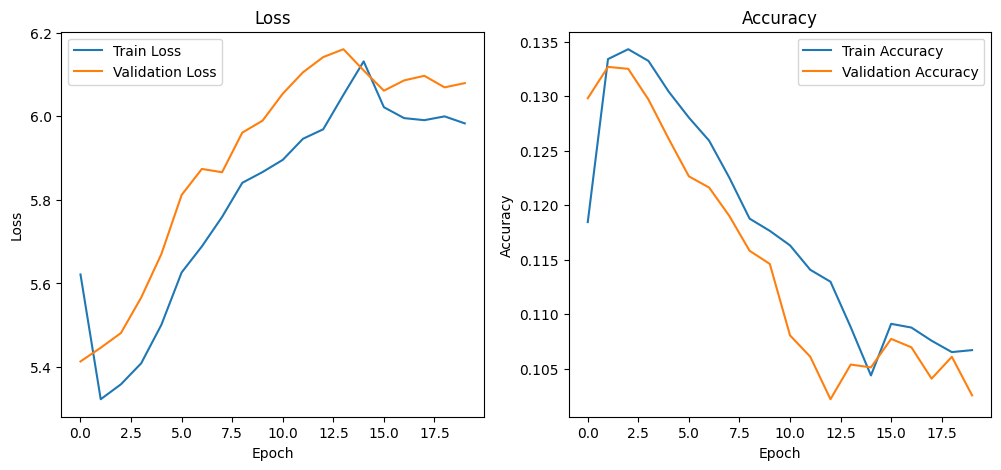

Average FPS: 2775.30
Average time per sample: 0.36 ms


In [94]:
# Removes Project Gutenberg boilerplate text
def removeBoilerplate(text):
    start_marker = r"\*\*\* START OF THE PROJECT GUTENBERG EBOOK.*?\*\*\*"
    end_marker = r"\*\*\* END OF THE PROJECT GUTENBERG EBOOK.*?\*\*\*"
    start_match = re.search(start_marker, text, re.IGNORECASE | re.DOTALL)
    end_match = re.search(end_marker, text, re.IGNORECASE | re.DOTALL)
    clean_text = text[start_match.end():end_match.start()] if start_match and end_match else text
    return clean_text.strip()

# Extracts chapters based on chapter markers
def extractChapters(text):
    chapter_pattern = r'chapter\s+(?:[ivxlcdm]+|\d+)\.\s*'
    matches = list(re.finditer(chapter_pattern, text, flags=re.IGNORECASE))
    chapters = [text[matches[i].end():matches[i+1].start()].strip() if i+1 < len(matches) else text[matches[i].end():].strip() for i in range(len(matches))]
    return chapters

# Expands contractions like "can't" to "cannot"
def expand_text_contractions(text):
    return contractions.fix(text)

# Converts numerical digits to words (e.g., '123' to 'one hundred twenty-three')
def convert_numbers(text):
    def replace_num(match):
        num_str = match.group()
        try:
            num_word = num2words(int(num_str))
            return num_word
        except:
            return num_str
    return re.sub(r'\b\d+\b', replace_num, text)

# Removes punctuation from text
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

# Cleans and preprocesses the text
def clean_and_preprocess(text):
    text = text.lower()
    text = BeautifulSoup(text, "html.parser").get_text()
    text = expand_text_contractions(text)
    text = convert_numbers(text)
    text = remove_punctuation(text)
    text = re.sub(r'chapter\s+\w+', '', text, flags=re.IGNORECASE)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Processes each chapter, saves each as a separate file in the output directory
def preprocess_and_extractChapters(input_file, output_directory):
    os.makedirs(output_directory, exist_ok=True)
    with open(input_file, 'r', encoding='utf-8') as file:
        data = file.read()
    data = removeBoilerplate(data)
    chapters = extractChapters(data)
    print(f"Total chapters extracted: {len(chapters)}")
    for idx, chapter in enumerate(chapters, 1):
        cleaned_chapter = clean_and_preprocess(chapter)
        output_file = os.path.join(output_directory, f'chapter_{idx}.txt')
        with open(output_file, 'w', encoding='utf-8') as f:
            f.write(cleaned_chapter)
        print(f"Saved Chapter {idx} to {output_file}")
    print("All chapters have been processed and saved.")

# Loads all processed chapter files into a single concatenated text
def load_cleaned_chapters(output_directory):
    cleaned_text = ""
    chapter_files = sorted([f for f in os.listdir(output_directory) if f.startswith('chapter_') and f.endswith('.txt')],
                           key=lambda x: int(re.findall(r'chapter_(\d+)\.txt', x)[0]))
    for filename in chapter_files:
        filepath = os.path.join(output_directory, filename)
        with open(filepath, 'r', encoding='utf-8') as file:
            chapter = file.read()
            cleaned_text += chapter + " "
    return cleaned_text.strip()

# Tokenizes text, returns mappings and word frequencies
def tokenize_text(cleaned_data, oov_token='<UNK>'):
    tokens = re.findall(r'\b\w+\b', cleaned_data)
    word_counts = {word: tokens.count(word) for word in set(tokens)}
    word_to_index = {oov_token: 0}
    index_to_word = {0: oov_token}
    index = 1
    for word in word_counts:
        word_to_index[word] = index
        index_to_word[index] = word
        index += 1
    VocabularySize = len(word_to_index)
    sequence = [word_to_index.get(word, 0) for word in tokens]
    return word_to_index, index_to_word, VocabularySize, sequence, word_counts

# Generates input-output pairs for training based on sequence length
def generate_sequences(sequence, sequence_length):
    sequences = [sequence[i-sequence_length:i] for i in range(sequence_length, len(sequence))]
    labels = [sequence[i] for i in range(sequence_length, len(sequence))]
    return sequences, labels

# Filters out sequences containing padding tokens
def filter_sequences(X, y, padding_token=0):
    mask = y != padding_token
    return X[mask], y[mask]

# Oversamples sequences containing rare words based on a threshold
def oversample_sequences(X, y, word_counts, word_to_index, rare_word_threshold=2, oversampling_factor=5):
    rare_words = {word for word, count in word_counts.items() if count <= rare_word_threshold}
    rare_word_indices = {word_to_index[word] for word in rare_words if word in word_to_index}
    sequences_containing_rare_words = [seq for idx, seq in enumerate(X) if any(word in rare_word_indices for word in seq)]
    labels_for_rare_sequences = [y[idx] for idx, seq in enumerate(X) if any(word in rare_word_indices for word in seq)]
    X_oversampled = np.concatenate([X] + [sequences_containing_rare_words] * oversampling_factor)
    y_oversampled = np.concatenate([y] + [labels_for_rare_sequences] * oversampling_factor)
    return X_oversampled, y_oversampled

# Prepares data by tokenizing, generating sequences, and oversampling
def prepare_data(cleaned_data, sequence_length=30, oov_token='<UNK>', rare_word_threshold=2, oversampling_factor=5):
    word_to_index, index_to_word, VocabularySize, sequence, word_counts = tokenize_text(cleaned_data, oov_token=oov_token)
    sequences, labels = generate_sequences(sequence, sequence_length)
    X = np.array(sequences)
    y = np.array(labels)
    X_filtered, y_filtered = filter_sequences(X, y, padding_token=word_to_index[oov_token])
    X_oversampled, y_oversampled = oversample_sequences(X_filtered, y_filtered, word_counts, word_to_index,
                                                        rare_word_threshold=rare_word_threshold,
                                                        oversampling_factor=oversampling_factor)
    X_shuffled, y_shuffled = shuffle(X_oversampled, y_oversampled, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_shuffled, y_shuffled, test_size=0.1, random_state=42)
    return word_to_index, index_to_word, VocabularySize, X_train, X_val, y_train, y_val

# RNN model definition
class TextGenerationModel(nn.Module):
    def __init__(self, VocabularySize, embeddingDimension):
        super(TextGenerationModel, self).__init__()
        self.embedding = nn.Embedding(num_embeddings=VocabularySize, embedding_dim=embeddingDimension)
        self.rnn1 = nn.RNN(input_size=embeddingDimension, hidden_size=128, batch_first=True)
        self.rnn2 = nn.RNN(input_size=128, hidden_size=64, batch_first=True)
        self.fc1 = nn.Linear(64, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, VocabularySize)
        
    def forward(self, x):
        x = self.embedding(x)
        x, _ = self.rnn1(x)
        x, hn = self.rnn2(x)
        x = hn[-1]
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Trains the RNN model and displays epoch statistics
def train_model(model, X_train, y_train, X_val, y_val, batch_size=64, epochs=20):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)

    X_train = torch.LongTensor(X_train)
    y_train = torch.LongTensor(y_train)
    X_val = torch.LongTensor(X_val)
    y_val = torch.LongTensor(y_val)

    train_dataset = TensorDataset(X_train, y_train)
    val_dataset = TensorDataset(X_val, y_val)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)

    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(1, epochs + 1):
        model.train()
        train_loss = 0
        correct_train = 0
        total_train = 0
        
        for batch_x, batch_y in train_loader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)
            optimizer.zero_grad()
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += batch_y.size(0)
            correct_train += (predicted == batch_y).sum().item()

        train_loss /= len(train_loader)
        train_accuracy = correct_train / total_train
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)

        model.eval()
        val_loss = 0
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for batch_x, batch_y in val_loader:
                batch_x, batch_y = batch_x.to(device), batch_y.to(device)
                outputs = model(batch_x)
                loss = criterion(outputs, batch_y)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total_val += batch_y.size(0)
                correct_val += (predicted == batch_y).sum().item()

        val_loss /= len(val_loader)
        val_accuracy = correct_val / total_val
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f"Epoch {epoch}/{epochs}")
        print(f"Train Loss: {train_loss:.4f} | Train Accuracy: {train_accuracy:.4f}")
        print(f"Validation Loss: {val_loss:.4f} | Validation Accuracy: {val_accuracy:.4f}")
        print("-" * 50)

    # Plot the training and validation loss and accuracy
    plt.figure(figsize=(12, 5))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Train Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

    return model

# Measures frames per second (FPS) for single-sample inference
def measure_inference_fps_single(model, X_test, num_samples=100):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    
    total_time = 0.0
    indices = np.random.choice(len(X_test), num_samples, replace=False)
    X_samples = X_test[indices]
    X_samples = torch.LongTensor(X_samples).to(device)

    for x in X_samples:
        x = x.unsqueeze(0)  # Convert to batch of 1
        start_time = time.time()
        prediction = model(x)
        end_time = time.time()
        total_time += (end_time - start_time)
    
    avg_time_per_sample = (total_time / num_samples) * 1000  # Convert to milliseconds
    fps = num_samples / total_time
    return fps, avg_time_per_sample

# Main function to load data, build, train, and evaluate the model
def main():
    input_directory = 'cleaned_chapters'
    sequence_length = 30
    embeddingDimension = 100
    batch_size = 32
    epochs = 20
    rare_word_threshold = 2
    oversampling_factor = 5

    cleaned_data = load_cleaned_chapters(input_directory)
    print(f"Total cleaned text length: {len(cleaned_data)} characters")

    word_to_index, index_to_word, VocabularySize, X_train, X_val, y_train, y_val = prepare_data(
        cleaned_data, sequence_length=sequence_length, oov_token='<UNK>',
        rare_word_threshold=rare_word_threshold, oversampling_factor=oversampling_factor
    )

    model = build_model(VocabularySize, embeddingDimension=embeddingDimension)
    train_model(model, X_train, y_train, X_val, y_val, batch_size=batch_size, epochs=epochs)

    fps, time_per_sample = measure_inference_fps_single(model, X_val, num_samples=100)
    print(f"Average FPS: {fps:.2f}")
    print(f"Average time per sample: {time_per_sample:.2f} ms")

if __name__ == "__main__":
    main()
